### Telecom Churn Group Case Study


### Objective:Analyse the customer level telecom data and build predictive models to identify customers at high risk of churn and additionally identify the main indicators of churn

#### Geographical Location: The data provided is for the Indian and Southeast Asian Market

#### Additional Business Details:

##### 1.) Postpaid Vs Prepaid: The prepaid is most common model in the current market.
##### 2.) Postpaid Vs Prepaid Customer Churn Criticality: Identifying customer churn in prepaid customer segment is more critical.
##### 3.) Churn Definition: Customers who have not done any usage, either incoming or outgoing - interms of calls, internet over a period of time.
##### 4.) High Value Churn: 80% of revenue comes from top 20% customer. Predict Churn only on high value customer.

#### Addition Provided Data Information

##### 1.) The customer data is from last 4 months June, July, August and September
#####  2.) Customer behaviour has three phases - Good, Action and Churn. Good - When customer is happy and Action when customer is unsatisfied and unhappy and Churn is the phase when customer actually Churns.
##### 3.) The data from June and July belongs to good phase and August represents Action phase and September is Churn Phase./
#####  4.) Target Variable - There is no defined target variable identifying customer churn. The data from September(Churn Phase) should be used by using pre-defined rules to identify and define a target variable for churn and no-churn.




### Table of Contents

[Data Analysis & Data Cleaning](#Data-Analysis-and-Data-Cleaning)

[Filter for High Value Customer records](#FILTERING-HIGH-VALUE-CUSTOMERS-RECORDS)

[Examining the Data](#Examining-the-data)

[Applying PCA](#Applying-PCA-on-the-balanced-data-set)

[Logistic Regression - PCA](#Logistic-Regression-on-Principle-components)

[Random Forest - PCA](#Random-forest-on-Principle-components)

[Decision Tree - PCA](#Decision-Tree-on-PCA)

[XGBoost - PCA](#XGBoost-on-PCA-data)

[Compare Models](#plot-comparing-all-models-across-KPIs-on-PCA-data)

[Models for Interpretation](#modelling-on-orignal-Data)

[Decision Tree](#Decision-tree)

[XGBoost](#XGboost)

[Final Recommendation](#Final-Recommendation)


In [1]:
### Import necessary libraries
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
import matplotlib.colors as clr
from collections import Counter

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
# Importing classification report and confusion matrix etc from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score

#Improting the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# import graphviz
from IPython.display import Image
#import pydotplus
import pydot_ng as pydot
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC

C:\Users\akaspand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Set Pandas display options for easier reading
pd.set_option("max_colwidth", 100)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 9001)  # there is a scrollbar and '...' just looks stupid
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [5]:
### Read the telecom churn data csv file
telecom_customer_df = pd.read_csv('telecom_churn_data.csv')

In [6]:
#### Look at some sample records
telecom_customer_df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   
5     7000286308        109            0.00            0.00            0.00   
6     7001051193        109            0.00            0.00            0.00   
7     7000701601        109            0.00            0.00            0.00   
8     7001524846        109            0.00            0.00            0.00   
9     7001864400        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014   197.38   214.82   213.80   21.10          nan   
1            9/30/2014    34.05   355.07   268.32   86.28        24.11   
2            9/30/2014   167.69   189.06   210.23  290.71        11.54   
3            9/30/2014   221.34   251.10   508.05  389.50        99.91   
4            9/30/2014   261.64   309.88   238.17  163.43        50.31   
5            9/30/2014    50.26    58.81    83.39  170.83        50.16   
6            9/30/2014   429.02   190.70   255.11  114.75        71.03   
7            9/30/2014 1,069.18 1,349.85 3,171.48  500.00        57.84   
8            9/30/2014   378.72   492.22   137.36  166.79       413.69   
9            9/30/2014   119.52   247.44   170.23  160.04        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          nan        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           nan          16.23          33.49          31.64   
8        136.48        108.71           0.00           0.00           0.00

In [7]:
date_cols = [col for col in telecom_customer_df.columns if 'date' in col]
telecom_customer_df[date_cols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [8]:
### Lets look at dataset info. The dataset is huge in terms of observations and features
print(telecom_customer_df.info())
print(telecom_customer_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None
(99999, 226)


### Data Analysis and Data Cleaning

In [9]:
### Mobile number should be unique confirm for unique record counts

telecom_customer_df['mobile_number'].nunique()  

#### Looks like all records are unique
#### Let's confirm the data type of the variables. Lets first look at date columns

date_cols = [col for col in telecom_customer_df.columns if 'date' in col]
print(telecom_customer_df[date_cols].info())

#### Looks like all the datecolumns are object lets convert the datatype of all such date fields

def lookup(s):
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

telecom_customer_df[date_cols]=telecom_customer_df[date_cols].apply(lookup)

#### Confirm if changes are applied correctly

print(telecom_customer_df[date_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
date_of_last_rech_6         98392 non-null object
date_of_last_rech_7         98232 non-null object
date_of_last_rech_8         96377 non-null object
date_of_last_rech_9         95239 non-null object
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
dtypes: object(12)
memory usage: 9.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99398 non-null datetime64[ns]
last_date_of_month_8

In [10]:
#rename vbc_3g_ columns with month numbers
telecom_customer_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6'}, inplace=True)
telecom_customer_df.rename(columns={'jul_vbc_3g': 'vbc_3g_7'}, inplace=True)
telecom_customer_df.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)
telecom_customer_df.rename(columns={'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [11]:
### Lets look at other columns excluding the monthly kpis
other_cols = telecom_customer_df.columns[~(telecom_customer_df.columns.str.contains('_6')|telecom_customer_df.columns.str.contains('_7')|telecom_customer_df.columns.str.contains('_8')|telecom_customer_df.columns.str.contains('_9'))]
print(telecom_customer_df[other_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
mobile_number     99999 non-null int64
circle_id         99999 non-null int64
loc_og_t2o_mou    98981 non-null float64
std_og_t2o_mou    98981 non-null float64
loc_ic_t2o_mou    98981 non-null float64
aon               99999 non-null int64
dtypes: float64(3), int64(3)
memory usage: 4.6 MB
None


In [12]:
#### All datatype looks good now just look at each months columns and check the datatypes
june_cols = [col for col in telecom_customer_df.columns if '_6' in col]
print(telecom_customer_df[june_cols].info())
july_cols = [col for col in telecom_customer_df.columns if '_7' in col]
print(telecom_customer_df[july_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 55 columns):
last_date_of_month_6        99999 non-null datetime64[ns]
arpu_6                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
offnet_mou_6                96062 non-null float64
roam_ic_mou_6               96062 non-null float64
roam_og_mou_6               96062 non-null float64
loc_og_t2t_mou_6            96062 non-null float64
loc_og_t2m_mou_6            96062 non-null float64
loc_og_t2f_mou_6            96062 non-null float64
loc_og_t2c_mou_6            96062 non-null float64
loc_og_mou_6                96062 non-null float64
std_og_t2t_mou_6            96062 non-null float64
std_og_t2m_mou_6            96062 non-null float64
std_og_t2f_mou_6            96062 non-null float64
std_og_t2c_mou_6            96062 non-null float64
std_og_mou_6                96062 non-null float64
isd_og_mou_6                96062 non-null float64
spl_og_mou_6     

In [13]:
august_cols = [col for col in telecom_customer_df.columns if '_8' in col]
print(telecom_customer_df[august_cols].info())
sept_cols = [col for col in telecom_customer_df.columns if '_9' in col]
print(telecom_customer_df[sept_cols].info())
#### All the other datatype looks good and we can continue further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 55 columns):
last_date_of_month_8        98899 non-null datetime64[ns]
arpu_8                      99999 non-null float64
onnet_mou_8                 94621 non-null float64
offnet_mou_8                94621 non-null float64
roam_ic_mou_8               94621 non-null float64
roam_og_mou_8               94621 non-null float64
loc_og_t2t_mou_8            94621 non-null float64
loc_og_t2m_mou_8            94621 non-null float64
loc_og_t2f_mou_8            94621 non-null float64
loc_og_t2c_mou_8            94621 non-null float64
loc_og_mou_8                94621 non-null float64
std_og_t2t_mou_8            94621 non-null float64
std_og_t2m_mou_8            94621 non-null float64
std_og_t2f_mou_8            94621 non-null float64
std_og_t2c_mou_8            94621 non-null float64
std_og_mou_8                94621 non-null float64
isd_og_mou_8                94621 non-null float64
spl_og_mou_8     

#### NULL Value Identification and Treatment

In [14]:
#### Let's try to identify null value columns with greater than 70% null values
high_null_columns = telecom_customer_df.columns[(telecom_customer_df.isnull().sum()*100/telecom_customer_df.shape[0] > 70)]
print((telecom_customer_df[high_null_columns].isnull().sum()*100/telecom_customer_df.shape[0]))

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

In [15]:
print((telecom_customer_df[high_null_columns].describe()))

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count          25,153.00          25,571.00          26,339.00   
mean                2.46               2.67               2.65   
std                 2.79               3.03               3.07   
min                 1.00               1.00               1.00   
25%                 1.00               1.00               1.00   
50%                 1.00               1.00               1.00   
75%                 3.00               3.00               3.00   
max                61.00              54.00              60.00   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count          25,922.00        25,153.00        25,571.00        26,339.00   
mean                2.44           126.39           126.73           125.72   
std                 2.52           108.48           109.77           109.44   
min                 1.00             1.00             1.00             1.00   
25%       

In [16]:
### Lets impute 0 for all required variables. The total recharge data and average will be useful for filtering high value customers

telecom_customer_df['total_rech_data_6'].fillna(0,inplace=True)
telecom_customer_df['total_rech_data_7'].fillna(0,inplace=True)
telecom_customer_df['total_rech_data_8'].fillna(0,inplace=True)
telecom_customer_df['total_rech_data_9'].fillna(0,inplace=True)

telecom_customer_df['av_rech_amt_data_6'].fillna(0,inplace=True)
telecom_customer_df['av_rech_amt_data_7'].fillna(0,inplace=True)
telecom_customer_df['av_rech_amt_data_8'].fillna(0,inplace=True)
telecom_customer_df['av_rech_amt_data_9'].fillna(0,inplace=True)

### Lets impute 0 for max rech data as well. We can decide to drop it later but let's impute and keep as min value 1

telecom_customer_df['max_rech_data_6'].fillna(0,inplace=True)
telecom_customer_df['max_rech_data_7'].fillna(0,inplace=True)
telecom_customer_df['max_rech_data_8'].fillna(0,inplace=True)
telecom_customer_df['max_rech_data_9'].fillna(0,inplace=True)

### The fb user and night pck user are indicators which signify 1 as enrolled for the fb offer or night offer
### The other level can be defined as any value to indicate other than enrolled. Lets define other level as -1 because 0 may be misleading

telecom_customer_df['fb_user_6'].fillna(-1,inplace=True)
telecom_customer_df['fb_user_7'].fillna(-1,inplace=True)
telecom_customer_df['fb_user_8'].fillna(-1,inplace=True)
telecom_customer_df['fb_user_9'].fillna(-1,inplace=True)

### Same goes with night_pck_user

telecom_customer_df['night_pck_user_6'].fillna(-1,inplace=True)
telecom_customer_df['night_pck_user_7'].fillna(-1,inplace=True)
telecom_customer_df['night_pck_user_8'].fillna(-1,inplace=True)
telecom_customer_df['night_pck_user_9'].fillna(-1,inplace=True)


### Date columns may not be very useful but no. of days since last recharge can be an important metric
### Let's get the number of days since last recharge for data from the end of month date

telecom_customer_df['days_data_last_rech_6'] = (telecom_customer_df['last_date_of_month_6'] - telecom_customer_df['date_of_last_rech_data_6'])
telecom_customer_df['days_data_last_rech_7'] = (telecom_customer_df['last_date_of_month_7'] - telecom_customer_df['date_of_last_rech_data_7'])
telecom_customer_df['days_data_last_rech_8'] = (telecom_customer_df['last_date_of_month_8'] - telecom_customer_df['date_of_last_rech_data_8'])
telecom_customer_df['days_data_last_rech_9'] = (telecom_customer_df['last_date_of_month_9'] - telecom_customer_df['date_of_last_rech_data_9'])
telecom_customer_df['days_data_last_rech_6'].fillna(0,inplace=True)
telecom_customer_df['days_data_last_rech_7'].fillna(0,inplace=True)
telecom_customer_df['days_data_last_rech_8'].fillna(0,inplace=True)
telecom_customer_df['days_data_last_rech_8'].fillna(0,inplace=True)

### Additonally as we identified days for data let's also identify days for last recharge
### Let's get the number of days since last recharge from the end of month date and then fill na with 0

telecom_customer_df['days_last_rech_6'] = (telecom_customer_df['last_date_of_month_6'] - telecom_customer_df['date_of_last_rech_6'])
telecom_customer_df['days_last_rech_7'] = (telecom_customer_df['last_date_of_month_7'] - telecom_customer_df['date_of_last_rech_7'])
telecom_customer_df['days_last_rech_8'] = (telecom_customer_df['last_date_of_month_8'] - telecom_customer_df['date_of_last_rech_8'])
telecom_customer_df['days_last_rech_9'] = (telecom_customer_df['last_date_of_month_9'] - telecom_customer_df['date_of_last_rech_9'])
telecom_customer_df['days_last_rech_6'].fillna(0,inplace=True)
telecom_customer_df['days_last_rech_7'].fillna(0,inplace=True)
telecom_customer_df['days_last_rech_8'].fillna(0,inplace=True)
telecom_customer_df['days_last_rech_9'].fillna(0,inplace=True)


#### Additionally lets also convert the days to integer numbers like age of network to maintain consistency

day_cols = [col for col in telecom_customer_df.columns if 'days' in col]
days_df = (telecom_customer_df[day_cols] / np.timedelta64(1, 'D')).astype('int64')
telecom_customer_df.drop(day_cols,axis=1,inplace=True)
telecom_customer_df = pd.concat([telecom_customer_df,days_df],axis=1)

#### Finally lets drop all date columns as we have no. of days since last recharge and date can be dropped now

date_cols = [col for col in telecom_customer_df.columns if 'date' in col]
telecom_customer_df.drop(date_cols,axis=1,inplace=True)

In [17]:
#drop columns with low variance
pd.DataFrame(telecom_customer_df).std().sort_values().head(10)
print("shape before drop",telecom_customer_df.shape)
telecom_customer_df = telecom_customer_df.loc[:, telecom_customer_df.std() > 0.001]
print("shape after drop",telecom_customer_df.shape)

('shape before drop', (99999, 222))
('shape after drop', (99999, 210))


In [18]:
#### Let's further try to identify null value columns with greater than 70% null values
high_null_columns = telecom_customer_df.columns[(telecom_customer_df.isnull().sum()*100/telecom_customer_df.shape[0] > 70)]
print((telecom_customer_df[high_null_columns].isnull().sum()*100/telecom_customer_df.shape[0]))
print((telecom_customer_df[high_null_columns].describe()))

count_rech_2g_6   74.85
count_rech_2g_7   74.43
count_rech_2g_8   73.66
count_rech_2g_9   74.08
count_rech_3g_6   74.85
count_rech_3g_7   74.43
count_rech_3g_8   73.66
count_rech_3g_9   74.08
arpu_3g_6         74.85
arpu_3g_7         74.43
arpu_3g_8         73.66
arpu_3g_9         74.08
arpu_2g_6         74.85
arpu_2g_7         74.43
arpu_2g_8         73.66
arpu_2g_9         74.08
dtype: float64
       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
count        25,153.00        25,571.00        26,339.00        25,922.00   
mean              1.86             2.04             2.02             1.78   
std               2.57             2.77             2.72             2.21   
min               0.00             0.00             0.00             0.00   
25%               1.00             1.00             1.00             1.00   
50%               1.00             1.00             1.00             1.00   
75%               2.00             2.00             2.00      

In [19]:
###### The above columns all contain high null values and if we look in detail the count and ARPU for 2G and 2G have similar null
###### percentage which may be an indicator that they are common set of records. ARPU is not 0 and signifies key metric.
###### simply dropping that may not be correct. Lets do one thing let's compute total ARPU data and then drop the invidvidual
###### ARPU 2g, ARPU 3G and count columns
telecom_customer_df['arpu_data_6'] = telecom_customer_df['arpu_2g_6']+telecom_customer_df['arpu_3g_6']
telecom_customer_df['arpu_data_7'] = telecom_customer_df['arpu_2g_7']+telecom_customer_df['arpu_3g_7']
telecom_customer_df['arpu_data_8'] = telecom_customer_df['arpu_2g_8']+telecom_customer_df['arpu_3g_8']
telecom_customer_df['arpu_data_9'] = telecom_customer_df['arpu_2g_9']+telecom_customer_df['arpu_3g_9']

#### Also lets impute the null summed arpu columns to 0
telecom_customer_df['arpu_data_6'].fillna(0,inplace=True)
telecom_customer_df['arpu_data_7'].fillna(0,inplace=True)
telecom_customer_df['arpu_data_8'].fillna(0,inplace=True)
telecom_customer_df['arpu_data_9'].fillna(0,inplace=True)

#### Now lets drop the high null columns which are count 2g, 3g and ARPU 2g and 3g

telecom_customer_df.drop(high_null_columns,axis=1,inplace=True)
print(telecom_customer_df.shape)

(99999, 198)


### FILTERING HIGH VALUE CUSTOMERS RECORDS

In [20]:
### Lets define the total amount data and use it further for calculation
telecom_customer_df['av_rech_amt_6_7'] = (telecom_customer_df['total_rech_amt_6']+telecom_customer_df['total_rech_amt_7']).astype(float)/(telecom_customer_df['total_rech_num_6']+telecom_customer_df['total_rech_num_7'])
telecom_customer_df['av_rech_data_6_7'] = (telecom_customer_df['av_rech_amt_data_6']+telecom_customer_df['av_rech_amt_data_7']).astype(float)/2
telecom_customer_df['average_rech_6_7'] = telecom_customer_df['av_rech_amt_6_7'] + telecom_customer_df['av_rech_data_6_7']

telecom_customer_df_hv = telecom_customer_df[telecom_customer_df['average_rech_6_7'] >= telecom_customer_df['average_rech_6_7'].quantile(.7)]

#### Remove any columns used for temporary calculations average column used for filtering and keep remaining

telecom_customer_df.drop('average_rech_6_7',axis=1,inplace=True)
telecom_customer_df.drop('av_rech_amt_6_7',axis=1,inplace=True)
telecom_customer_df.drop('av_rech_data_6_7',axis=1,inplace=True)
telecom_customer_df_hv.drop('average_rech_6_7',axis=1,inplace=True)
telecom_customer_df_hv.drop('av_rech_amt_6_7',axis=1,inplace=True)
telecom_customer_df_hv.drop('av_rech_data_6_7',axis=1,inplace=True)

telecom_customer_df_hv.shape

(29947, 198)

##### The total number of high value customers as per recharge criterion specified by the problem statement is  roughly 29.9k

In [21]:
#### Now lets look at med null values between 0 and 70
low_null_columns = telecom_customer_df_hv.columns[(telecom_customer_df_hv.isnull().sum()*100/telecom_customer_df_hv.shape[0] > 0)]
print((telecom_customer_df_hv[low_null_columns].isnull().sum()*100/telecom_customer_df_hv.shape[0]))

onnet_mou_6        3.75
onnet_mou_7        3.68
onnet_mou_8        5.73
onnet_mou_9        7.82
offnet_mou_6       3.75
offnet_mou_7       3.68
offnet_mou_8       5.73
offnet_mou_9       7.82
roam_ic_mou_6      3.75
roam_ic_mou_7      3.68
roam_ic_mou_8      5.73
roam_ic_mou_9      7.82
roam_og_mou_6      3.75
roam_og_mou_7      3.68
roam_og_mou_8      5.73
roam_og_mou_9      7.82
loc_og_t2t_mou_6   3.75
loc_og_t2t_mou_7   3.68
loc_og_t2t_mou_8   5.73
loc_og_t2t_mou_9   7.82
loc_og_t2m_mou_6   3.75
loc_og_t2m_mou_7   3.68
loc_og_t2m_mou_8   5.73
loc_og_t2m_mou_9   7.82
loc_og_t2f_mou_6   3.75
loc_og_t2f_mou_7   3.68
loc_og_t2f_mou_8   5.73
loc_og_t2f_mou_9   7.82
loc_og_t2c_mou_6   3.75
loc_og_t2c_mou_7   3.68
loc_og_t2c_mou_8   5.73
loc_og_t2c_mou_9   7.82
loc_og_mou_6       3.75
loc_og_mou_7       3.68
loc_og_mou_8       5.73
loc_og_mou_9       7.82
std_og_t2t_mou_6   3.75
std_og_t2t_mou_7   3.68
std_og_t2t_mou_8   5.73
std_og_t2t_mou_9   7.82
std_og_t2m_mou_6   3.75
std_og_t2m_mou_7

In [22]:
print(telecom_customer_df_hv[low_null_columns].describe())

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count    28,825.00    28,845.00    28,231.00    27,604.00     28,825.00   
mean        152.37       155.21       145.47       138.15        253.48   
std         351.19       367.74       351.11       335.06        398.23   
min           0.00         0.00         0.00         0.00          0.00   
25%           5.88         5.44         4.98         4.16         33.51   
50%          38.09        37.08        35.23        32.18        126.53   
75%         137.41       138.98       129.58       123.02        310.94   
max       7,011.11     8,157.78     9,977.41     7,970.79      8,362.36   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count     28,845.00     28,231.00     27,604.00      28,825.00      28,845.00   
mean         255.37        242.89        233.11          13.51          10.76   
std          406.55        391.00        378.71          68.72          68.67   


In [23]:
### The above medium null columns are below 10%. Removal of such rows may impact the overall churn ration and hence since
#### it is small percentage let's impute them with zeros.

# telecom_customer_df.dropna(subset=low_null_columns.tolist(), inplace=True)
for col in low_null_columns:
   telecom_customer_df_hv[col].fillna(0,inplace=True)
#### Lets look at shape now

telecom_customer_df_hv.shape

(29947, 198)

In [24]:
### Lets again look at if null values
low_null_columns = telecom_customer_df_hv.columns[(telecom_customer_df_hv.isnull().sum()*100/telecom_customer_df_hv.shape[0] > 0)]
print((telecom_customer_df_hv[low_null_columns].isnull().sum()*100/telecom_customer_df_hv.shape[0]))

Series([], dtype: float64)


#### TARGET CLASS VARIABLE

##### As a next step lets define the target variable for churn. Churn = 1 is churned customer and 0 means non-churned
##### Rule - Any customers where for month of September Total Incoming, Total Outgoing and 2G and 3G Volume is 0 will be classified as Churn

In [25]:
telecom_customer_df_hv['churn']=np.where((telecom_customer_df_hv['total_ic_mou_9'].eq(0) & telecom_customer_df_hv['total_og_mou_9'].eq(0) & telecom_customer_df_hv['vol_2g_mb_9'].eq(0) & telecom_customer_df_hv['vol_3g_mb_9'].eq(0)),1,0)
telecom_customer_df_hv['churn'].astype('category').value_counts()

0    27511
1     2436
Name: churn, dtype: int64

##### High % of non-churn and 11% of churn customer. This is classical reject interference problem.
##### The classes are highly imbalance and hence can impact outputs. We can further plan to peform sampling
##### Additionally we can use correct evaluation metrics by considering the class imbalance and that can also help
##### Lets first remove the september column and further filter the records for high value customer

In [26]:
# Drop september columns
print ("before dataframe shape",telecom_customer_df_hv.shape )
sept_cols = [col for col in telecom_customer_df.columns if '_9' in col]
telecom_customer_df_hv.drop(sept_cols,axis = 1, inplace = True)
print ("After dataframe shape",telecom_customer_df_hv.shape )    

('before dataframe shape', (29947, 199))
('After dataframe shape', (29947, 150))


### Categorical Variables treatment
##### Let's convert the categorical variable with the churn by non-churn ratio so that we can feed the features to PCA

In [27]:
# Function to manipulate categorical features
def catEncoder(pca_df, x):
   churn_0 = pca_df.loc[ ((pca_df[x].eq(0)) & (pca_df['churn'].eq(1))) ,[x]].count()
   churn_1 = pca_df.loc[ ((pca_df[x].eq(1)) & (pca_df['churn'].eq(1))) ,[x]].count()
   churn_n1 = pca_df.loc[((pca_df[x].eq(-1)) & (pca_df['churn'].eq(1))) ,[x]].count()
   
   n_churn_0 = pca_df.loc[ ((pca_df[x].eq(0)) & (pca_df['churn'].eq(0))) ,[x]].count()
   n_churn_1 = pca_df.loc[ ((pca_df[x].eq(1)) & (pca_df['churn'].eq(0))) ,[x]].count()
   n_churn_n1 = pca_df.loc[((pca_df[x].eq(-1)) & (pca_df['churn'].eq(0))) ,[x]].count()

   print(churn_0, churn_1 , churn_n1 ,  n_churn_0, n_churn_1, n_churn_n1)
   if  n_churn_0.values == 0 :
    churn_ratio_0.values = 0.0
   else:
    churn_ratio_0 = churn_0.astype(float) /(n_churn_0)
   if  n_churn_1.values == 0 :
    churn_ratio_1.values = 0.0
   else :
    churn_ratio_1 = churn_1.astype(float) /( n_churn_1)
    
   if n_churn_n1.values == 0 :
    churn_ratio_n1.values = 0.0
   else: 
    churn_ratio_n1 = churn_n1.astype(float) /( n_churn_n1)    

   pca_df.loc[ pca_df[x].eq(0), [x]] = churn_ratio_0.values
   pca_df.loc[ pca_df[x].eq(1), [x]] = churn_ratio_1.values
   pca_df.loc[ pca_df[x].eq(-1), [x]] = churn_ratio_n1.values    


In [28]:
catEncoder(telecom_customer_df_hv,'fb_user_6')
catEncoder(telecom_customer_df_hv,'fb_user_7')
catEncoder(telecom_customer_df_hv,'fb_user_8')

catEncoder(telecom_customer_df_hv,'night_pck_user_6')
catEncoder(telecom_customer_df_hv,'night_pck_user_7')
catEncoder(telecom_customer_df_hv,'night_pck_user_8')


(fb_user_6    129
dtype: int64, fb_user_6    1404
dtype: int64, fb_user_6    903
dtype: int64, fb_user_6    1266
dtype: int64, fb_user_6    17754
dtype: int64, fb_user_6    8491
dtype: int64)
(fb_user_7    107
dtype: int64, fb_user_7    1103
dtype: int64, fb_user_7    1226
dtype: int64, fb_user_7    1331
dtype: int64, fb_user_7    18199
dtype: int64, fb_user_7    7981
dtype: int64)
(fb_user_8    72
dtype: int64, fb_user_8    452
dtype: int64, fb_user_8    1912
dtype: int64, fb_user_8    979
dtype: int64, fb_user_8    16686
dtype: int64, fb_user_8    9846
dtype: int64)
(night_pck_user_6    1500
dtype: int64, night_pck_user_6    33
dtype: int64, night_pck_user_6    903
dtype: int64, night_pck_user_6    18706
dtype: int64, night_pck_user_6    314
dtype: int64, night_pck_user_6    8491
dtype: int64)
(night_pck_user_7    1190
dtype: int64, night_pck_user_7    20
dtype: int64, night_pck_user_7    1226
dtype: int64, night_pck_user_7    19245
dtype: int64, night_pck_user_7    285
dtype: int64,

In [29]:
#drop cell id and mobile number also as they are not adding any value
telecom_customer_df_hv.drop(['mobile_number'], axis = 1, inplace  = True)

### Examining the data

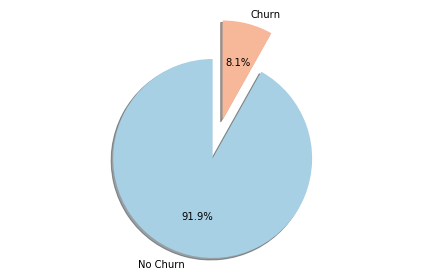

In [30]:
#demonstrate class imbalance using pie plot
labels = ['No Churn', 'Churn']
#count each type
churn_count = len(telecom_customer_df_hv[(telecom_customer_df_hv['churn']==True)])
no_churn_count = len(telecom_customer_df_hv) - churn_count
sizes = [no_churn_count, churn_count]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.4)  
fig1, ax1 = plt.subplots()

colors = sns.color_palette("RdBu_r", n_colors=2)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

### Class imbalance
#### We can see above only 8.1% of high value customers churn

In [31]:
# set matplotlib options for consistent plots
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False # True activates latex output in fonts!
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [32]:
# set seaborn options for consistent plots
sns.set(rc={"figure.figsize": (20, 12)})
sns.set_context("notebook", font_scale=1.1)

In [33]:
telecom_customer_df_hv_churn  = telecom_customer_df_hv.loc[telecom_customer_df_hv['churn'] == 1,:]
telecom_customer_df_hv_nchurn  = telecom_customer_df_hv.loc[telecom_customer_df_hv['churn'] == 0,:]
print(telecom_customer_df_hv_churn.shape)
print(telecom_customer_df_hv_nchurn.shape)
corr_churn = telecom_customer_df_hv_churn.corr()
corr_nonchurn = telecom_customer_df_hv_nchurn.corr()

(2436, 149)
(27511, 149)


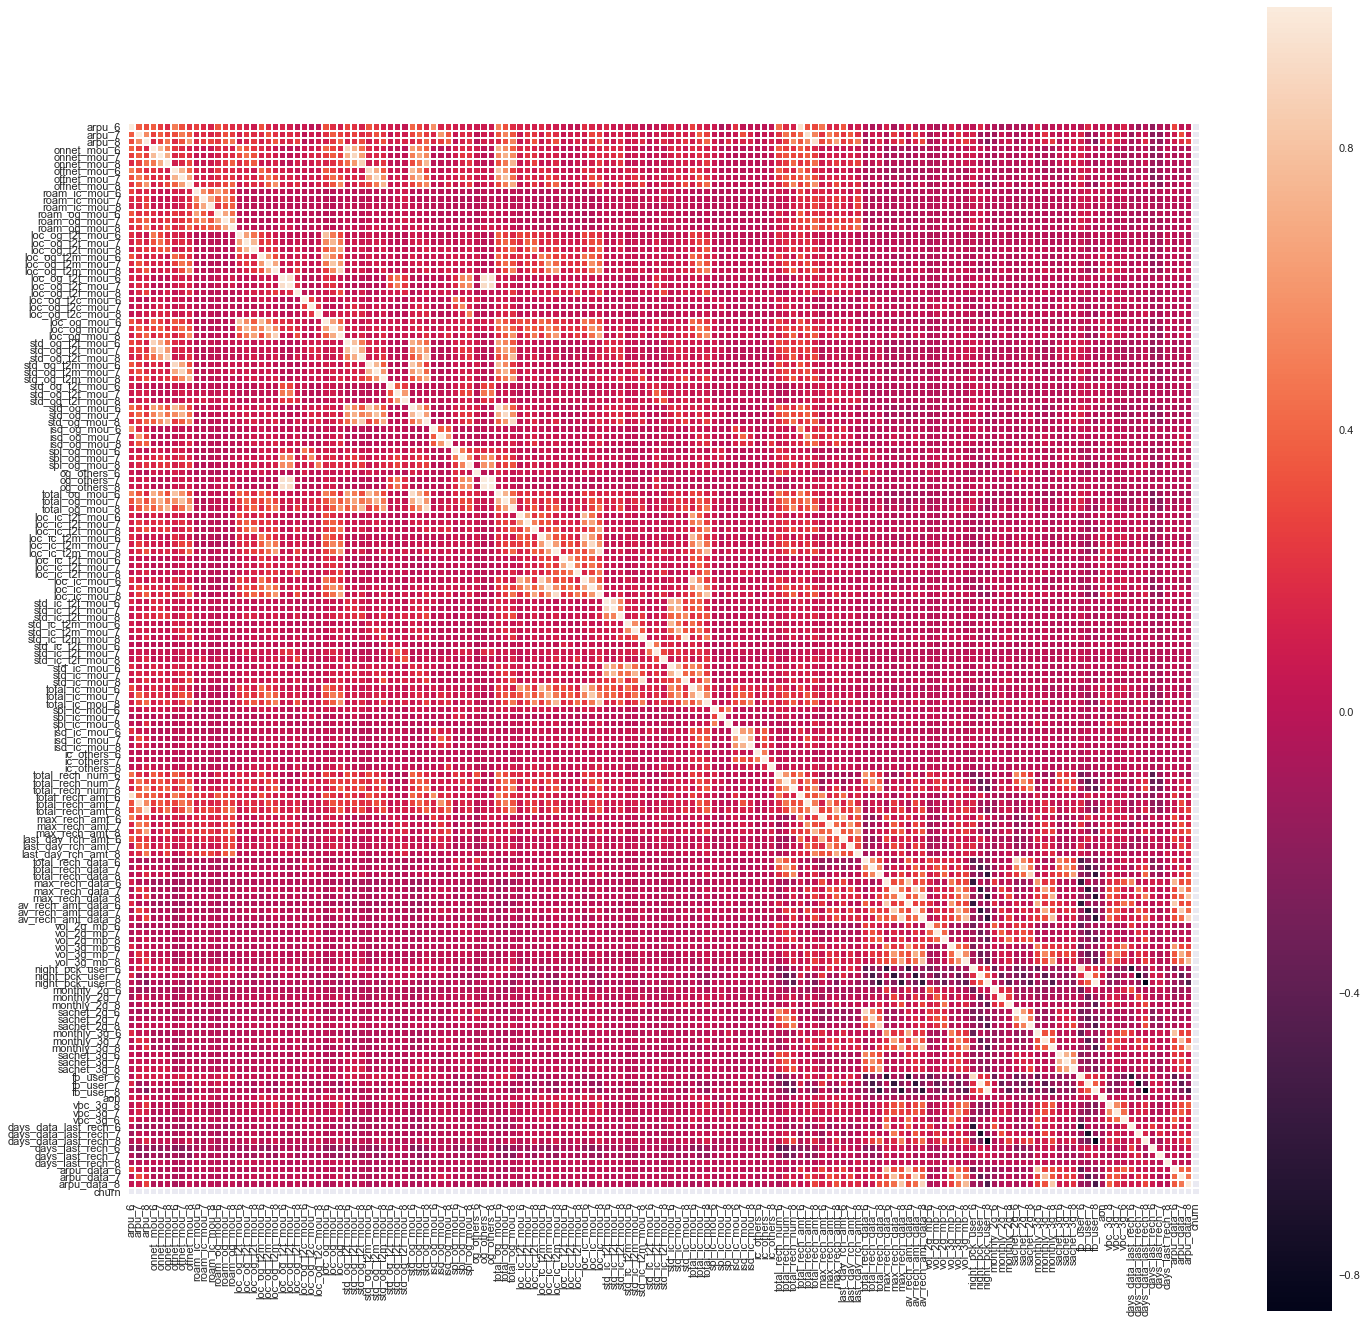

In [34]:
fig = plt.figure( figsize = (24.0,24.0) )
ax = sns.heatmap(corr_churn, xticklabels=True, yticklabels=True, square = True, linewidths=.9)
fig.add_axes(ax)

#### Inference
#### The 
#### 

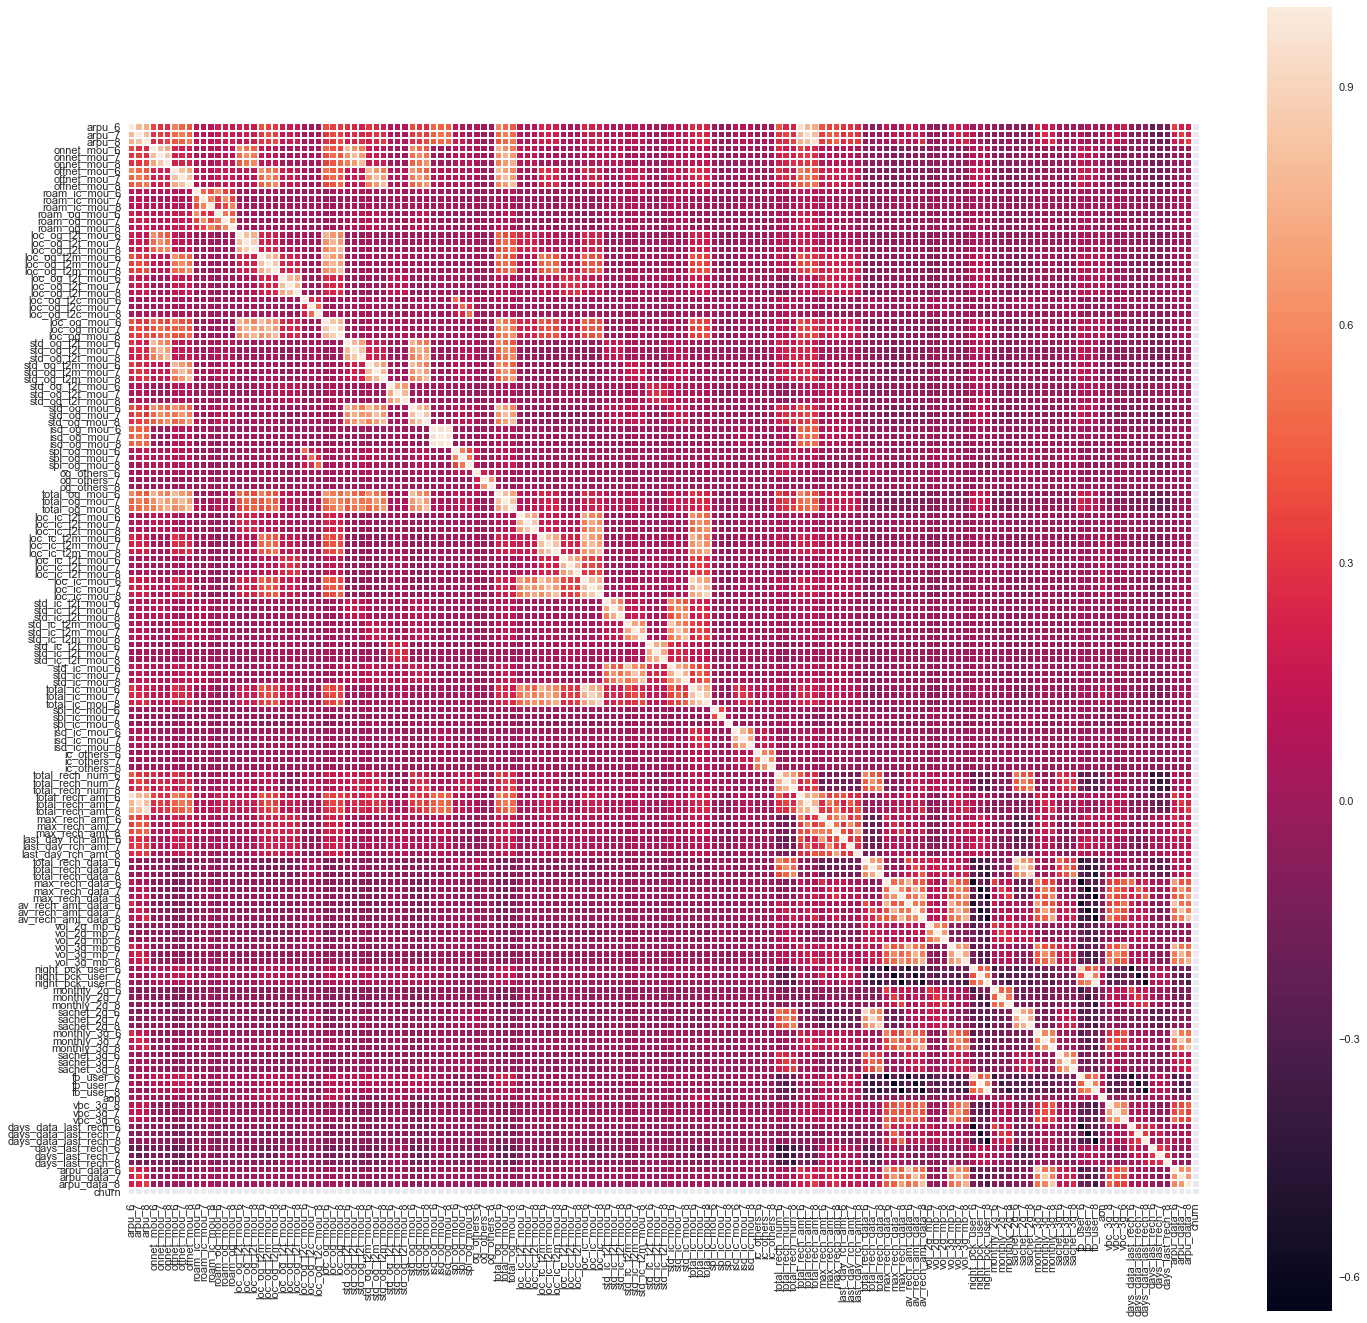

In [35]:
fig = plt.figure( figsize = (24.0,24.0) )
ax = sns.heatmap(corr_nonchurn, xticklabels=True, yticklabels=True, square = True, linewidths=.9)
fig.add_axes(ax)

#### Inference
#####
#####

In [36]:
telecom_customer_df_hv_churn.reset_index(inplace = True)
telecom_customer_df_hv_nchurn.reset_index(inplace = True)

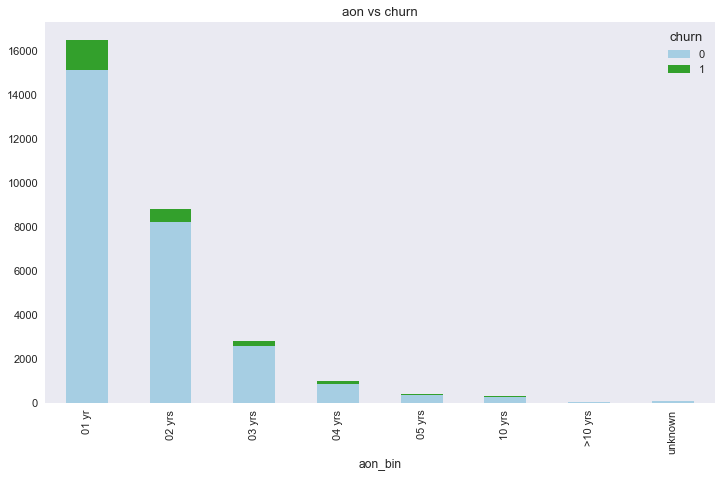

In [37]:
### Let's define function for binning
def aon_bin_yrs(n):
    if n >=0 and n < 365:
        return '01 yr'
    elif n >=365 and n < (2*365):
        return '02 yrs'
    elif n >=(2*365) and n < (3*365):
        return '03 yrs'
    elif n >=(3*365) and n < (4*365):
        return '04 yrs'
    elif n >=(4*365) and n < (5*365):
        return '05 yrs'
    elif n >=(5*365) and n < (10*365):
        return '10 yrs'
    elif n >=(10*365):
        return '>10 yrs'
    else:
        return 'unknown'
        
telecom_customer_df_hv['aon_bin'] = telecom_customer_df_hv['arpu_6'].apply(lambda x: aon_bin_yrs(x))
var = telecom_customer_df_hv.groupby(['aon_bin','churn']).arpu_6.count()
colors = sns.color_palette("Paired", n_colors=len(var))
cmap1 = clr.LinearSegmentedColormap.from_list("my_colormap", colors)
var.unstack().plot(kind='bar',stacked=True,  colormap=cmap1, grid=False)
plt.title('aon vs churn')
fig1 = plt.gcf()
fig1.set_size_inches(12, 7)
telecom_customer_df_hv.drop('aon_bin',axis=1,inplace=True)

#### Inference
#### It is clearly indicated that the churn customers are the ones who have spent less time with the network

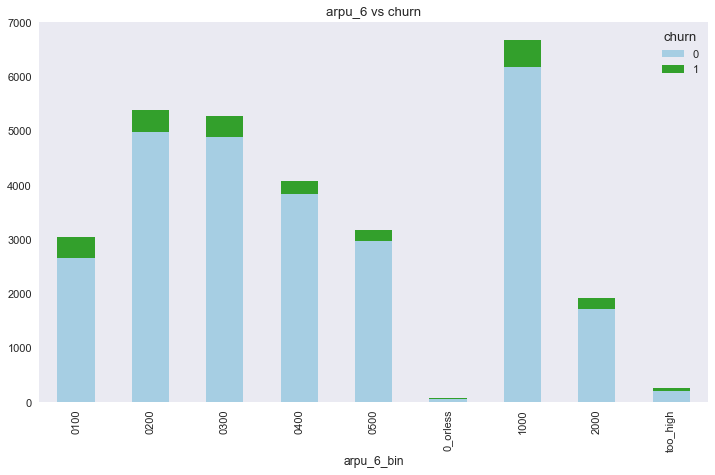

In [38]:
#Define the function for binning the data
def apru_bin(n):
    if n < 0:
        return '0_orless'
    elif n >=0 and n < 100:
        return '0100'
    elif n >=100 and n < 200:
        return '0200'
    elif n >=200 and n < 300:
        return '0300'
    elif n >=300 and n < 400:
        return '0400'
    elif n >=400 and n < 500:
        return '0500'
    elif n >=500 and n < 1000:
        return '1000'
    elif n >=1000 and n < 2000:
        return '2000'
    elif n >=2000:
        return 'too_high'
    else:
        return 'unknown'
        
telecom_customer_df_hv['arpu_6_bin'] = telecom_customer_df_hv['arpu_6'].apply(lambda x: apru_bin(x))
var = telecom_customer_df_hv.groupby(['arpu_6_bin','churn']).arpu_6.count()
var.unstack().plot(kind='bar',stacked=True,  colormap=cmap1, grid=False)
plt.title('arpu_6 vs churn')
fig1 = plt.gcf()
fig1.set_size_inches(12, 7)
ax = plt.gca()
telecom_customer_df_hv.drop('arpu_6_bin',axis=1,inplace=True)

#### Inference
#### We can infer from above plot that the most number of churn customers have ARPU between 500 to 1000.

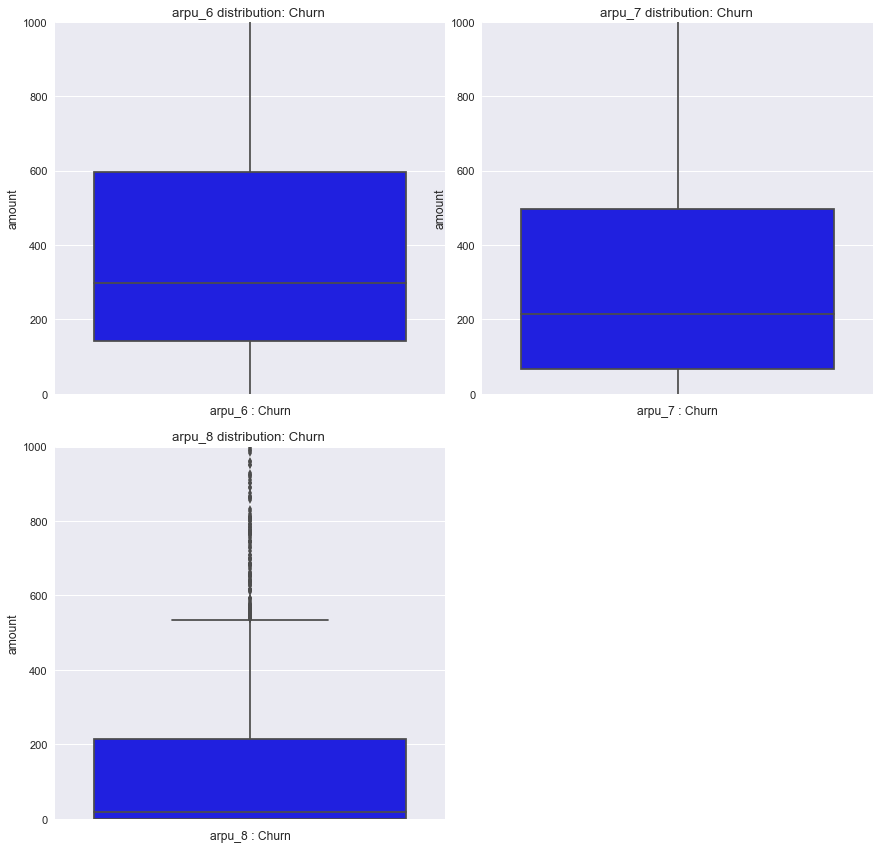

In [39]:
#### Box Plots
plt.rcParams["patch.force_edgecolor"] = True

plt.subplot(2,2,1)
aw  =  sns.boxplot(telecom_customer_df_hv_churn['arpu_6'], color="b",orient = 'v', width = 0.8)
aw.set_title('arpu_6 distribution: Churn ')
aw.set(xlabel='arpu_6 : Churn', ylabel='amount')
plt.ylim(0,1000)
plt.grid(True)

plt.subplot(2,2,2)
aw  =  sns.boxplot(telecom_customer_df_hv_churn['arpu_7'], color="b",orient = 'v', width = 0.8)
aw.set_title('arpu_7 distribution: Churn ')
aw.set(xlabel='arpu_7 : Churn', ylabel='amount')
plt.ylim(0,1000)
plt.grid(True)

plt.subplot(2,2,3)
aw  =  sns.boxplot(telecom_customer_df_hv_churn['arpu_8'], color="b",orient = 'v', width = 0.8)
aw.set_title('arpu_8 distribution: Churn ')
aw.set(xlabel='arpu_8 : Churn', ylabel='amount')
plt.ylim(0,1000)
plt.grid(True)
fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(12,12)

#### Inference
#### We can clearly see that the average ARPU is droping month over month and lowest in the 8th month

### outlier handling
From the boxplot above  we see that there are outliers present in data which can impact our analysis and modeling and so they should be handled

In [40]:
#Exclude the following 
date_cols = [col for col in telecom_customer_df_hv.columns if 'date' in col]
not_include = ['churn','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
not_include = not_include + date_cols
#function to remove outliers

def outLierRemover(df,x):
    print(df[x].max())
    perc_95 = df.loc[(df[x]> 0.1)|(df[x] < -0.1) ,x].quantile(0.95)
    perc_75 = df.loc[(df[x]> 0.1)|(df[x] < -0.1) ,x].quantile(0.75)
    df.loc[df[x]>= perc_95 ,x] = perc_75
    print(x,perc_95,perc_75)
    print(df[x].max())
    
cols = telecom_customer_df_hv.loc[:, telecom_customer_df_hv.columns.difference(not_include) ].columns.tolist()
#print(cols)
for colname in cols:
    outLierRemover(telecom_customer_df_hv, colname)

4321
('aon', 3203.0, 2083.0)
3202.0
27731.088
('arpu_6', 1158.343, 562.283)
1157.2
35145.834
('arpu_7', 1179.3418, 566.298)
1179.189
33543.624
('arpu_8', 1178.8809, 553.1107499999999)
1178.88
12796.04
('arpu_data_6', 943.8325000000002, 424.34)
943.72
9790.26
('arpu_data_7', 965.7709999999983, 424.34)
964.7
6981.46
('arpu_data_8', 1017.1554999999993, 424.35)
1017.1
7546.0
('av_rech_amt_data_6', 505.0, 252.0)
504.0
4365.0
('av_rech_amt_data_7', 545.0, 274.0)
544.0
4076.0
('av_rech_amt_data_8', 577.5999999999985, 274.0)
577.0
29
('days_data_last_rech_6', 26.0, 18.0)
25.0
30
('days_data_last_rech_7', 27.0, 19.0)
26.0
30
('days_data_last_rech_8', 27.0, 19.0)
26.0
29
('days_last_rech_6', 18.0, 11.0)
17.0
30
('days_last_rech_7', 17.0, 10.0)
16.0
30
('days_last_rech_8', 22.0, 8.0)
21.0
1178.99
('ic_others_6', 16.90649999999999, 2.71)
16.84
1033.73
('ic_others_7', 22.77, 3.84)
22.73
694.53
('ic_others_8', 18.91, 3.0949999999999998)
18.89
6789.41
('isd_ic_mou_6', 232.1015000000001, 40.6924999999

### Feature Engineering

In [41]:
# derive categorical features "is_monthly", "is_sachet" "is_vbc"
# is_night_pck and is_fb_user are already captured elsewhere
monthly_col = [col for col in telecom_customer_df_hv if col.startswith('monthly_')]
telecom_customer_df_hv["is_monthly_usr"] = (telecom_customer_df_hv[monthly_col].select_dtypes(include=['number']) != 0).any(1).astype(int)


sachet_col = [col for col in telecom_customer_df_hv if col.startswith('sachet_')]
telecom_customer_df_hv["is_sachet_usr"] = (telecom_customer_df_hv[sachet_col].select_dtypes(include=['number']) != 0).any(1).astype(int)

In [42]:
telecom_customer_df_hv.groupby('churn')["is_monthly_usr"].count()

churn
0    27511
1     2436
Name: is_monthly_usr, dtype: int64

In [43]:
telecom_customer_df_hv.groupby('churn')["is_sachet_usr"].count()

churn
0    27511
1     2436
Name: is_sachet_usr, dtype: int64

In [44]:
## month on month recharge trend - decreasing or growing among churn/no-churn
telecom_customer_df_hv["col67_pct"] = ((telecom_customer_df_hv.total_rech_amt_7 - telecom_customer_df_hv.total_rech_amt_6).astype(float) * 100.0/ telecom_customer_df_hv.total_rech_amt_6).replace(np.inf, 0)
telecom_customer_df_hv["col78_pct"] = ((telecom_customer_df_hv.total_rech_amt_8 - telecom_customer_df_hv.total_rech_amt_7).astype(float) * 100.0/  telecom_customer_df_hv.total_rech_amt_7).replace(np.inf, 0)


avg_decline67_churn = telecom_customer_df_hv.groupby('churn')["col67_pct"].median()
avg_decline78_churn = telecom_customer_df_hv.groupby('churn')["col78_pct"].median()

avg_decline = pd.concat([avg_decline67_churn, avg_decline78_churn], axis=1)
avg_decline.columns = ['%decline 6to7', '%decline 7to8']
print(avg_decline)

       %decline 6to7  %decline 7to8
churn                              
0               0.00          -3.04
1             -21.01         -86.57


#### Inference
#### There is significant drop in total recharge amounts for churn customers month on month, where as it is flat for non-churn

Lets try to re-verify this drop graphically by the plots below

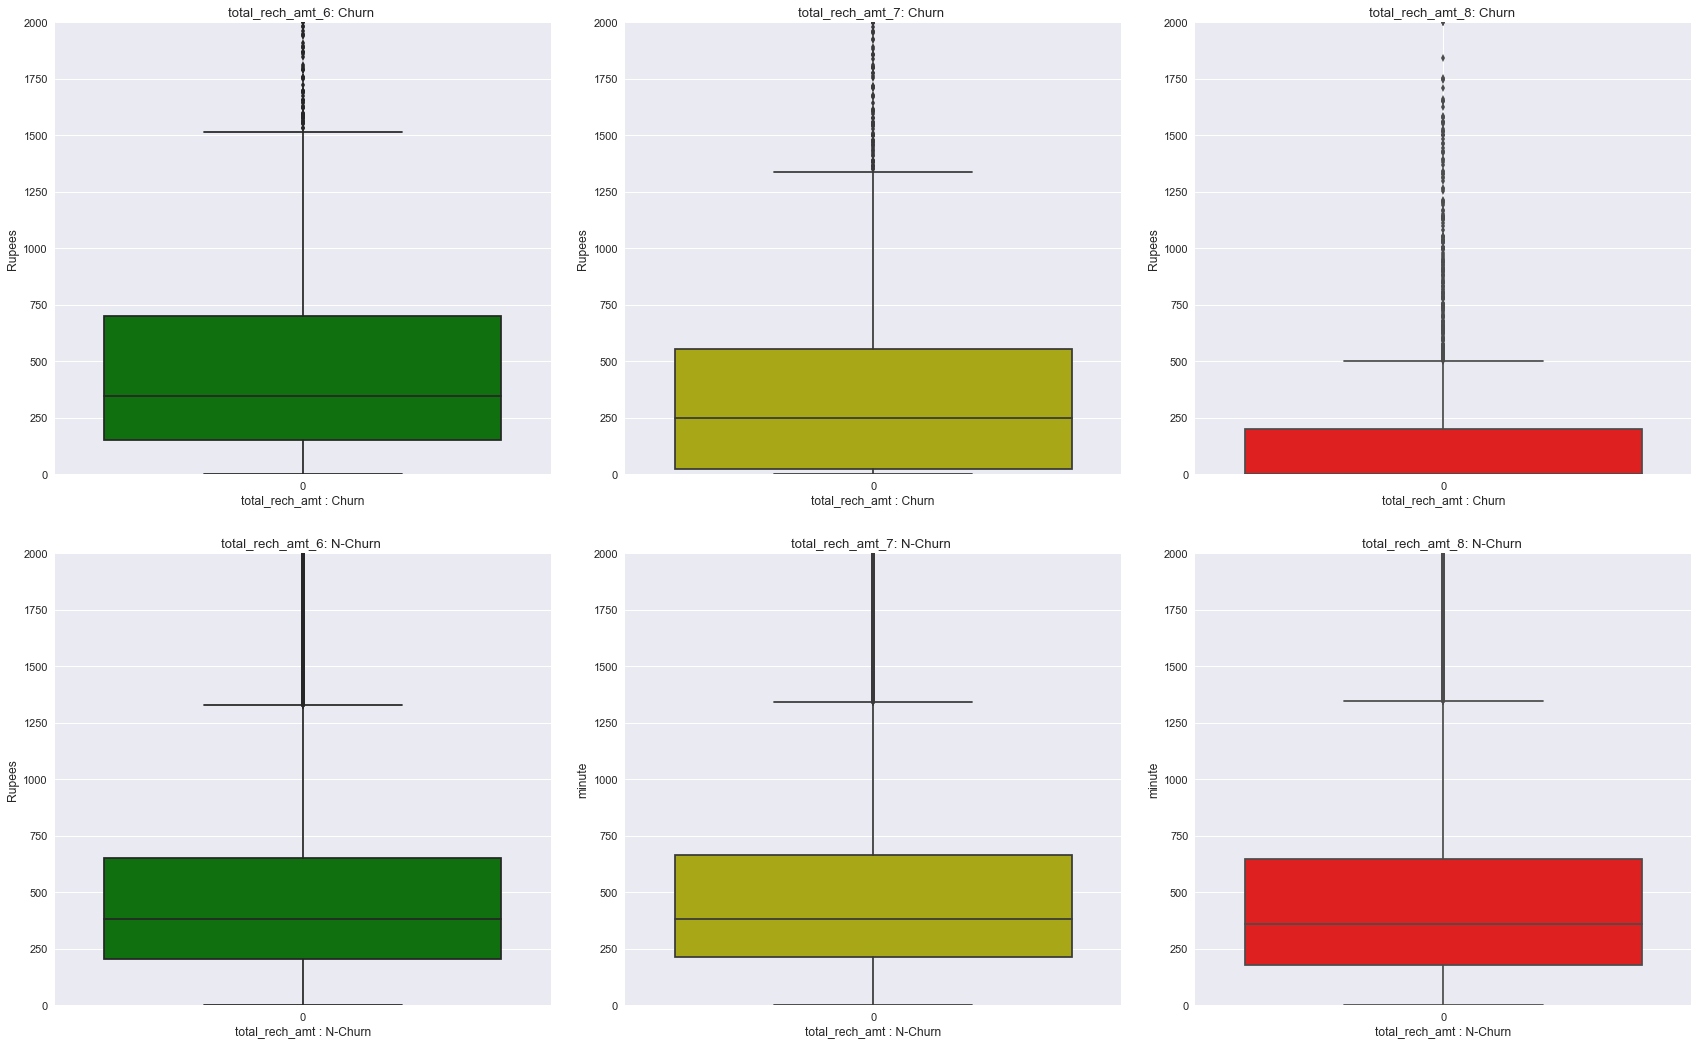

In [45]:
#Create box plot find distribution of suscpicious items
plt.rcParams["patch.force_edgecolor"] = True

plt.subplot(2,3,1)
aw  =  sns.boxplot( data = telecom_customer_df_hv_churn['total_rech_amt_6'], color="g",orient = 'v', width = 0.8)
aw.set_title('total_rech_amt_6: Churn ')
aw.set(xlabel='total_rech_amt : Churn', ylabel='Rupees')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,2)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_churn['total_rech_amt_7'],  color="y",orient = 'v', width = 0.8 )
aw1.set_title('total_rech_amt_7: Churn ')
aw1.set(xlabel='total_rech_amt : Churn', ylabel='Rupees')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,3)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_churn['total_rech_amt_8'],  color="r",orient = 'v', width = 0.8 )
aw1.set_title('total_rech_amt_8: Churn ')
aw1.set(xlabel='total_rech_amt : Churn', ylabel='Rupees')
plt.ylim(0,2000)
plt.grid(True)


plt.subplot(2,3,4)
aw  =  sns.boxplot( data = telecom_customer_df_hv_nchurn['total_rech_amt_6'], color="g",orient = 'v', width = 0.8)
aw.set_title('total_rech_amt_6: N-Churn ')
aw.set(xlabel='total_rech_amt : N-Churn', ylabel='Rupees')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,5)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_nchurn['total_rech_amt_7'],  color="y",orient = 'v', width = 0.8 )
aw1.set_title('total_rech_amt_7: N-Churn ')
aw1.set(xlabel='total_rech_amt : N-Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,6)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_nchurn['total_rech_amt_8'],  color="r",orient = 'v', width = 0.8 )
aw1.set_title('total_rech_amt_8: N-Churn ')
aw1.set(xlabel='total_rech_amt : N-Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)


fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(24,15)



#### The plots above indicates that the total recharge amount is dropping gradually for churn customers but it is flat for non-churn

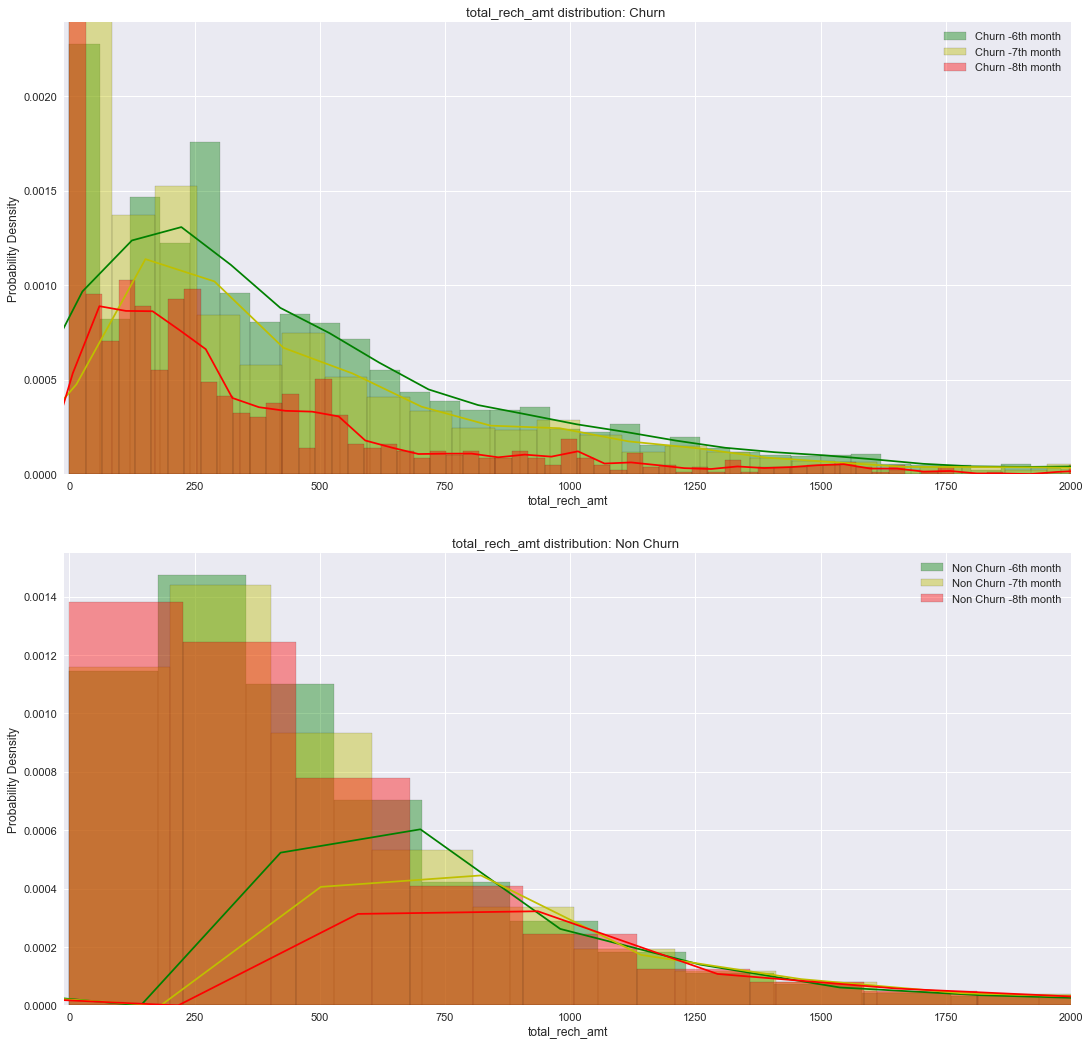

In [46]:
plt.rcParams["patch.force_edgecolor"] = True

plt.subplot(2,1,1)
aw  =  sns.distplot(telecom_customer_df_hv_churn['total_rech_amt_6'], bins=200, color="g", label = 'Churn -6th month')
aw1 =  sns.distplot(telecom_customer_df_hv_churn['total_rech_amt_7'], bins=200,  color="y", label = 'Churn -7th month')
aw2 =  sns.distplot(telecom_customer_df_hv_churn['total_rech_amt_8'], bins=200,  color="r", label = 'Churn -8th month')

aw.set_title('total_rech_amt distribution: Churn ')
aw.set(xlabel='total_rech_amt', ylabel='Probability Desnsity')
plt.legend()
plt.grid(True)
plt.xlim(-10,2000)

plt.subplot(2,1,2)
ax  =  sns.distplot(telecom_customer_df_hv_nchurn['total_rech_amt_6'], bins=200, color="g", label =  'Non Churn -6th month')
ax1 =  sns.distplot(telecom_customer_df_hv_nchurn['total_rech_amt_7'], bins=200,  color="y", label = 'Non Churn -7th month')
ax2 =  sns.distplot(telecom_customer_df_hv_nchurn['total_rech_amt_8'], bins=200,  color="r", label = 'Non Churn -8th month')

ax.set_title('total_rech_amt distribution: Non Churn ')
ax.set(xlabel='total_rech_amt', ylabel='Probability Desnsity')
plt.legend()
plt.grid(True)
plt.xlim(-10,2000)
fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(15,15)

#### Inference
#### ALl the above plots clearly indicates that the total recharge amount is dropping month over month for churn customers

In [47]:
telecom_data_churn_90_percentile = telecom_customer_df_hv_churn.loc[telecom_customer_df_hv_churn['total_rech_amt_6']
                                                          <= telecom_customer_df_hv_churn['total_rech_amt_6'].quantile(0.95),
                                                          ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'] ]

telecom_data_nchurn_90_percentile = telecom_customer_df_hv_nchurn.loc[telecom_customer_df_hv_nchurn['total_rech_amt_6']
                                                               <= telecom_customer_df_hv_nchurn['total_rech_amt_6'].quantile(0.95),
                                                                ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'] ]

Rand_sample_churn = telecom_data_churn_90_percentile.sample(n = 200)
Rand_sample_nonChurn = telecom_data_nchurn_90_percentile.sample(n = 200)

Rand_sample_churn.reset_index(inplace = True)
Rand_sample_nonChurn.reset_index(inplace = True)

x_churn = Rand_sample_churn['total_rech_amt_6'].values
y_churn = Rand_sample_churn['total_rech_amt_7'].values
z_churn = Rand_sample_churn['total_rech_amt_8'].values

x_nonChurn = Rand_sample_nonChurn['total_rech_amt_6'].values
y_nonChurn = Rand_sample_nonChurn['total_rech_amt_7'].values
z_nonChurn = Rand_sample_nonChurn['total_rech_amt_8'].values

No handlers could be found for logger "matplotlib.legend"


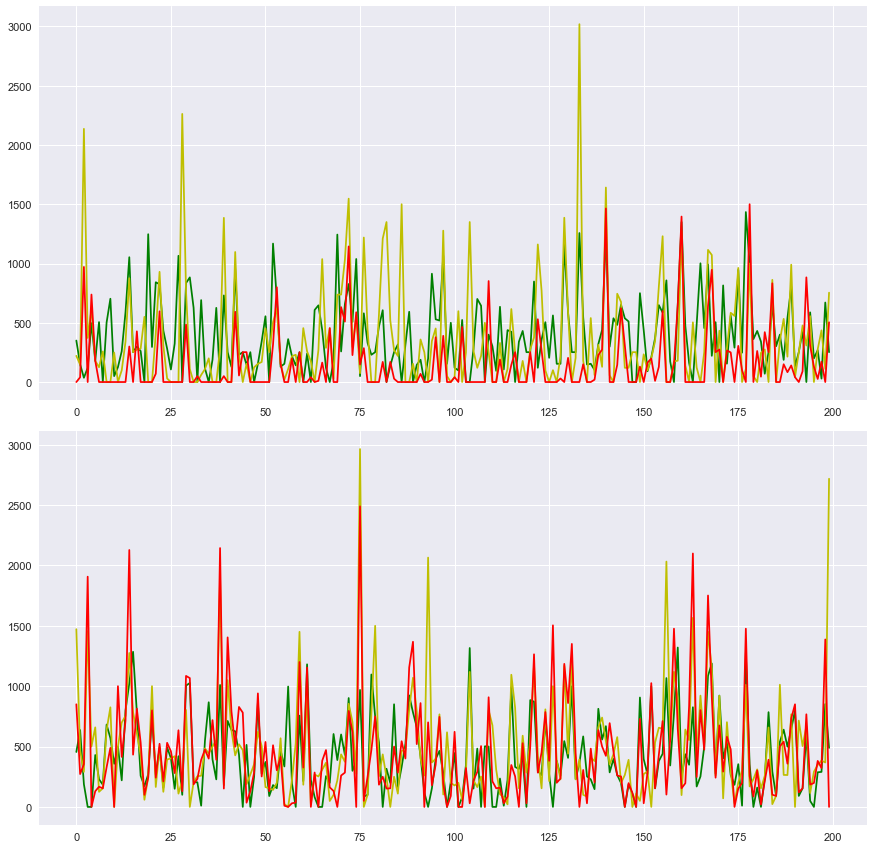

In [48]:
plt.subplot(2,1,1)
plt.plot(x_churn,color = 'g')
plt.plot(y_churn, color = 'y')
plt.plot(z_churn, color = 'r')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x_nonChurn,color = 'g')
plt.plot(y_nonChurn, color = 'y')
plt.plot(z_nonChurn, color = 'r')
plt.legend()

fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(12,12)

#### Inference
####

In [49]:
## month on month outgoing trend - decreasing or growing among churn/no-churn

telecom_customer_df_hv["col67_pct"] = ((telecom_customer_df_hv.total_og_mou_7 - telecom_customer_df_hv.total_og_mou_6).astype(float) * 100/ telecom_customer_df_hv.total_og_mou_6).replace(np.inf, 0)
telecom_customer_df_hv["col78_pct"] = ((telecom_customer_df_hv.total_og_mou_8 - telecom_customer_df_hv.total_og_mou_7).astype(float) * 100/ telecom_customer_df_hv.total_og_mou_7).replace(np.inf, 0)


#pd.crosstab(hival_df.is_churn, [hival_df.col67_pct, hival_df.col78_pct], margins=True)
avg_decline67_churn = telecom_customer_df_hv.groupby('churn')["col67_pct"].median()
avg_decline78_churn = telecom_customer_df_hv.groupby('churn')["col78_pct"].median()

avg_decline2 = pd.concat([avg_decline67_churn, avg_decline78_churn], axis=1)
avg_decline2.columns = ['%decline_6to7', '%decline_7to8']
print(avg_decline2)

       %decline_6to7  %decline_7to8
churn                              
0               0.00          -4.53
1             -26.53         -95.31


#### The above cleary shows that the total outgoing minutes of usage is declining month over month for churn customers

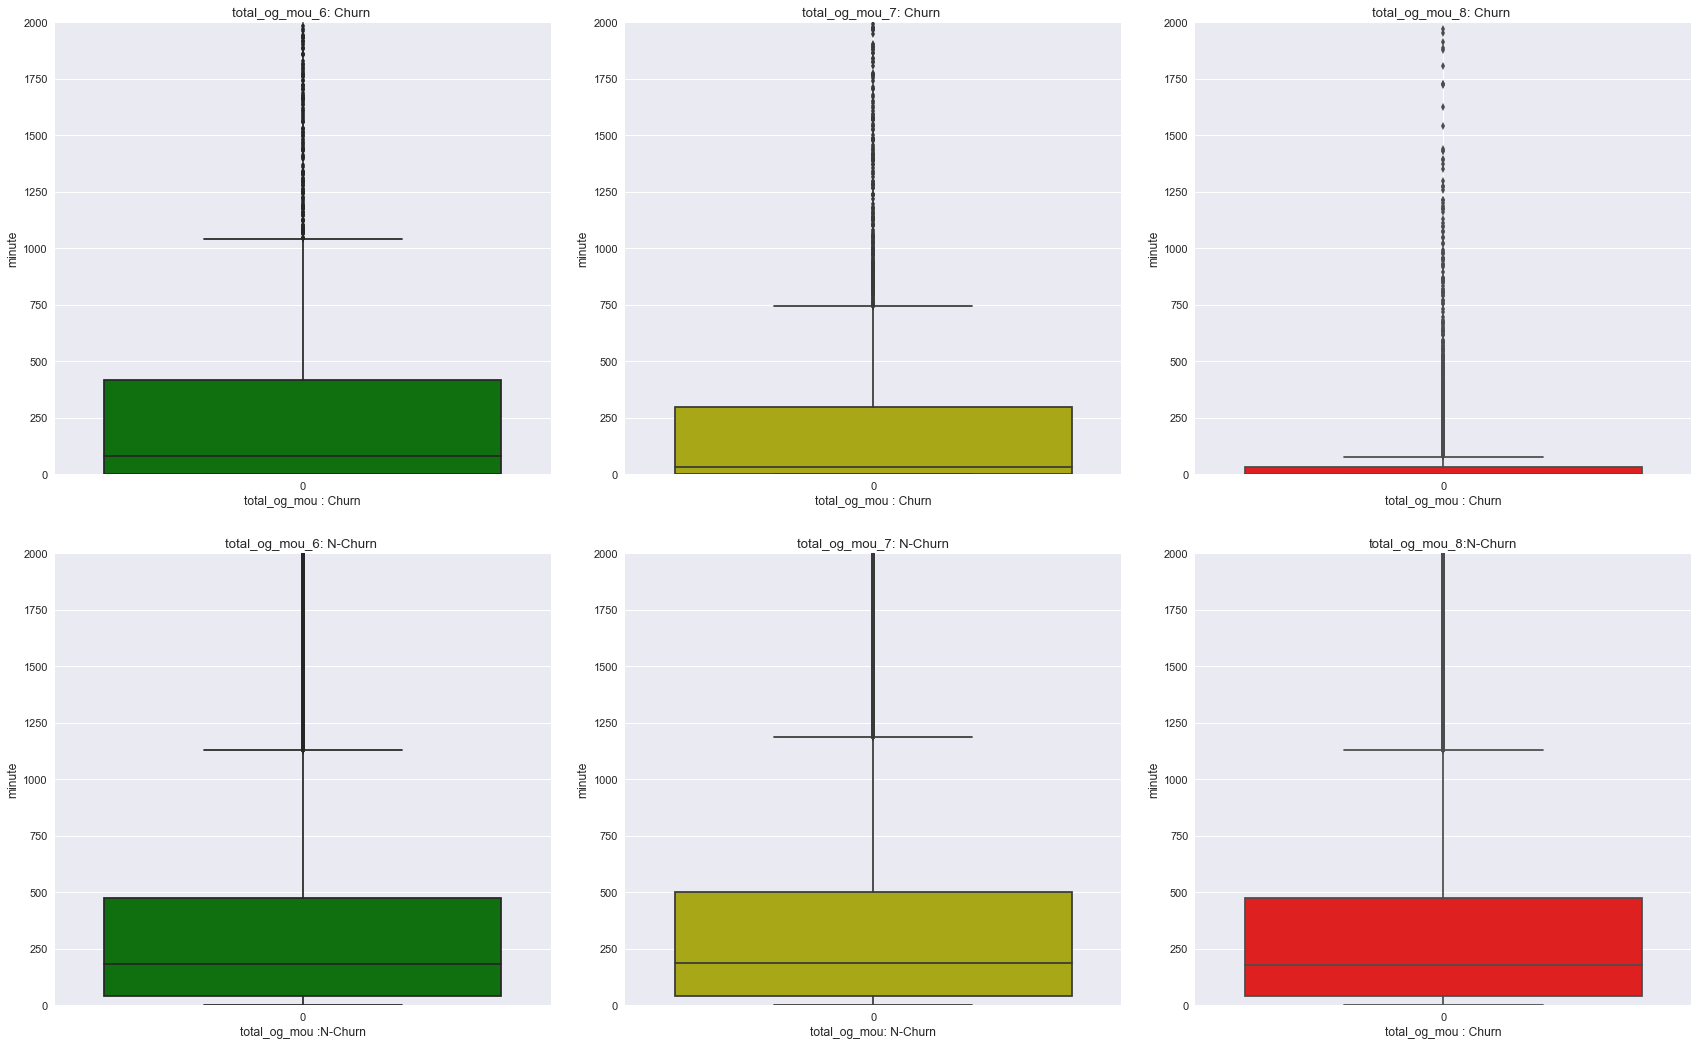

In [50]:
#Create box plot find distribution of suscpicious items
plt.rcParams["patch.force_edgecolor"] = True

plt.subplot(2,3,1)
aw  =  sns.boxplot( data = telecom_customer_df_hv_churn['total_og_mou_6'], color="g",orient = 'v', width = 0.8)
aw.set_title('total_og_mou_6: Churn ')
aw.set(xlabel='total_og_mou : Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,2)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_churn['total_og_mou_7'],  color="y",orient = 'v', width = 0.8 )
aw1.set_title('total_og_mou_7: Churn ')
aw1.set(xlabel='total_og_mou : Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,3)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_churn['total_og_mou_8'],  color="r",orient = 'v', width = 0.8 )
aw1.set_title('total_og_mou_8: Churn ')
aw1.set(xlabel='total_og_mou : Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)


plt.subplot(2,3,4)
aw  =  sns.boxplot( data = telecom_customer_df_hv_nchurn['total_og_mou_6'], color="g",orient = 'v', width = 0.8)
aw.set_title('total_og_mou_6: N-Churn ')
aw.set(xlabel='total_og_mou :N-Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,5)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_nchurn['total_og_mou_7'],  color="y",orient = 'v', width = 0.8 )
aw1.set_title('total_og_mou_7: N-Churn')
aw1.set(xlabel='total_og_mou: N-Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)

plt.subplot(2,3,6)
aw1 =  sns.boxplot( data = telecom_customer_df_hv_nchurn['total_og_mou_8'],  color="r",orient = 'v', width = 0.8 )
aw1.set_title('total_og_mou_8:N-Churn')
aw1.set(xlabel='total_og_mou : Churn', ylabel='minute')
plt.ylim(0,2000)
plt.grid(True)


fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(24,15)

#### Inference
#### The above box plots show how the average is lowest in 8th month and the ovarall month on month decline for 
#### total outgoin minutes of usage. We can see that for churn it is decline but is flat and consistent for non-churn

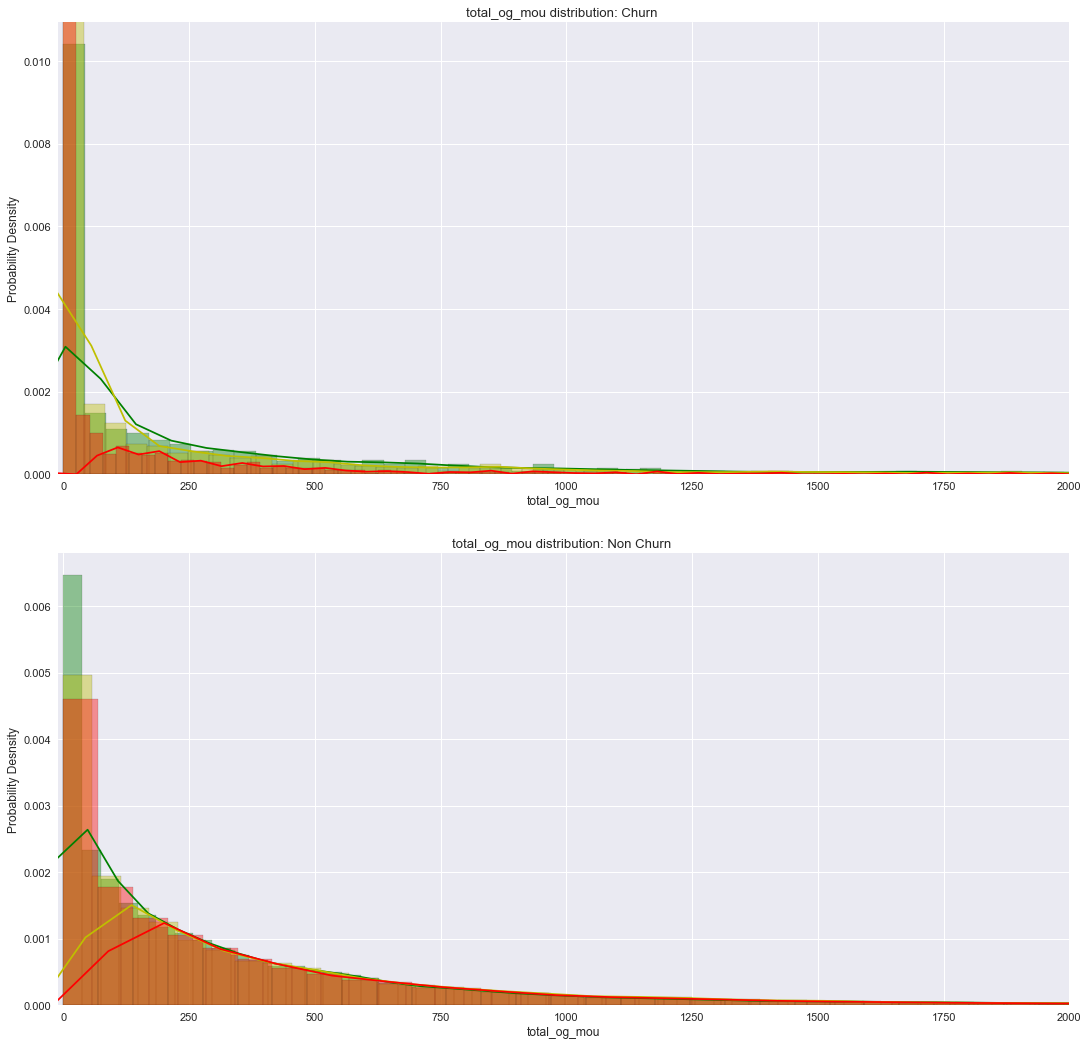

In [51]:
plt.rcParams["patch.force_edgecolor"] = True

plt.subplot(2,1,1)
aw  =  sns.distplot(telecom_customer_df_hv_churn['total_og_mou_6'], bins=200, color="g", label = 'Churn -6th month')
aw1 =  sns.distplot(telecom_customer_df_hv_churn['total_og_mou_7'], bins=200,  color="y", label = 'Churn -7th month')
aw2 =  sns.distplot(telecom_customer_df_hv_churn['total_og_mou_8'], bins=200,  color="r", label = 'Churn -8th month')

aw.set_title('total_og_mou distribution: Churn ')
aw.set(xlabel='total_og_mou', ylabel='Probability Desnsity')
plt.grid(True)
plt.xlim(-10,2000)

plt.subplot(2,1,2)
ax  =  sns.distplot(telecom_customer_df_hv_nchurn['total_og_mou_6'], bins=200, color="g", label =  'Non Churn -6th month')
ax1 =  sns.distplot(telecom_customer_df_hv_nchurn['total_og_mou_7'], bins=200,  color="y", label = 'Non Churn -7th month')
ax2 =  sns.distplot(telecom_customer_df_hv_nchurn['total_og_mou_8'], bins=200,  color="r", label = 'Non Churn -8th month')

ax.set_title('total_og_mou distribution: Non Churn ')
ax.set(xlabel='total_og_mou', ylabel='Probability Desnsity')
plt.grid(True)
plt.xlim(-10,2000)
fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(15,15)




#### Inference
#### The above probability density plot shows how for churn the curve drops drastically and goes down for churn customers

In [52]:
telecom_data_churn_90_percentile = telecom_customer_df_hv_churn.loc[telecom_customer_df_hv_churn['total_og_mou_6']
                                                          <= telecom_customer_df_hv_churn['total_og_mou_6'].quantile(0.95),
                                                          ['total_og_mou_6','total_og_mou_7','total_og_mou_8'] ]

telecom_data_nchurn_90_percentile = telecom_customer_df_hv_nchurn.loc[telecom_customer_df_hv_nchurn['total_og_mou_6']
                                                               <= telecom_customer_df_hv_nchurn['total_og_mou_6'].quantile(0.95),
                                                                ['total_og_mou_6','total_og_mou_7','total_og_mou_8'] ]

Rand_sample_churn = telecom_data_churn_90_percentile.sample(n = 200)
Rand_sample_nonChurn = telecom_data_nchurn_90_percentile.sample(n = 200)

Rand_sample_churn.reset_index(inplace = True)
Rand_sample_nonChurn.reset_index(inplace = True)

x_churn = Rand_sample_churn['total_og_mou_6'].values
y_churn = Rand_sample_churn['total_og_mou_7'].values
z_churn = Rand_sample_churn['total_og_mou_8'].values

x_nonChurn = Rand_sample_nonChurn['total_og_mou_6'].values
y_nonChurn = Rand_sample_nonChurn['total_og_mou_7'].values
z_nonChurn = Rand_sample_nonChurn['total_og_mou_8'].values

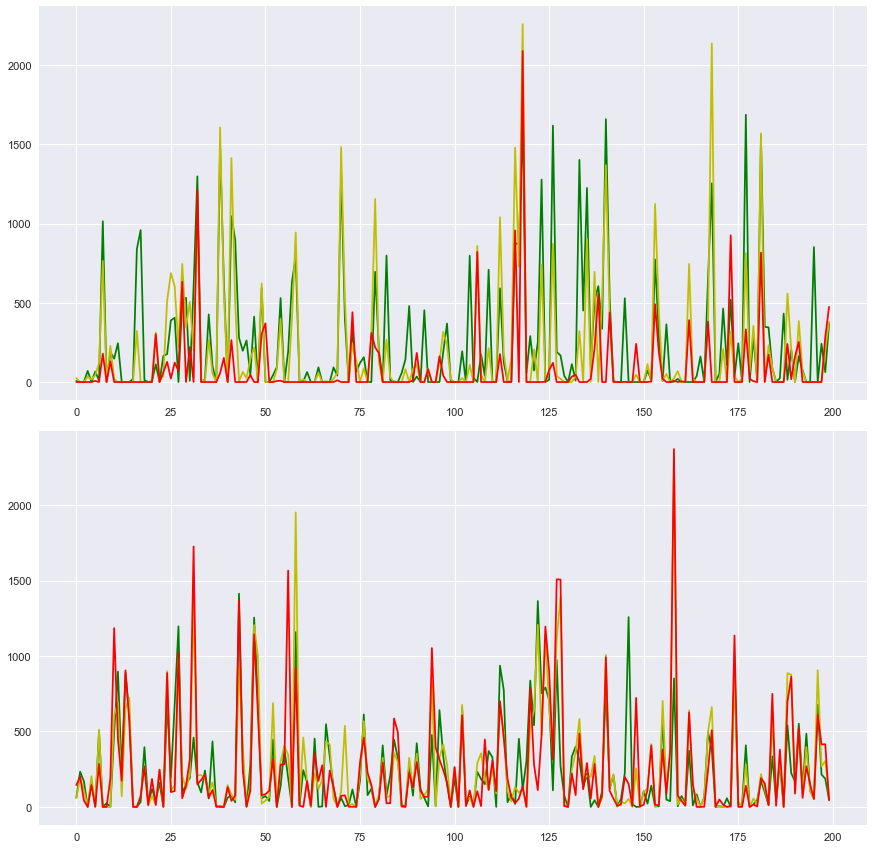

In [53]:
plt.subplot(2,1,1)
plt.plot(x_churn,color = 'g')
plt.plot(y_churn, color = 'y')
plt.plot(z_churn, color = 'r')

plt.subplot(2,1,2)
plt.plot(x_nonChurn,color = 'g')
plt.plot(y_nonChurn, color = 'y')
plt.plot(z_nonChurn, color = 'r')

fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(12,12)


#### Overall Inference from all plots is:
#### There is significant drop in total outgoing for churn customers month on month, where as it is flat for non-churn

In [54]:
# find ratio of incoming calls vs outgoing for churn and non-churn
telecom_customer_df_hv["col6_io"] = (telecom_customer_df_hv.total_ic_mou_6.astype(float)/telecom_customer_df_hv.total_og_mou_6).replace(np.inf, 0)
telecom_customer_df_hv["col7_io"] = (telecom_customer_df_hv.total_ic_mou_7.astype(float) /telecom_customer_df_hv.total_og_mou_7).replace(np.inf, 0)
telecom_customer_df_hv["col8_io"] = (telecom_customer_df_hv.total_ic_mou_8.astype(float) /telecom_customer_df_hv.total_og_mou_8).replace(np.inf, 0)
avg_io6_churn = telecom_customer_df_hv.groupby('churn')["col6_io"].median()
avg_io7_churn = telecom_customer_df_hv.groupby('churn')["col7_io"].median()
avg_io8_churn = telecom_customer_df_hv.groupby('churn')["col8_io"].median()

avg_ratio = pd.concat([avg_io6_churn, avg_io7_churn, avg_io8_churn], axis=1)
avg_ratio.columns = ['i_o_ratio @6', 'i_o_ratio @7', 'i_o_ratio@8']
print(avg_ratio)

       i_o_ratio @6  i_o_ratio @7  i_o_ratio@8
churn                                         
0              0.81          0.81         0.84
1              0.57          0.55         0.55


#### churn customers have "Low" proportion of incoming calls than outgoing calls

#### Normalize Data

In [55]:
not_include = ['churn','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
df=telecom_customer_df_hv.drop(not_include,axis=1)
normalized_df=(df-df.mean()).astype(float)/df.std()
telecom_normalized = telecom_customer_df_hv.drop(df.columns, 1)
telecom_normalized = pd.concat([telecom_normalized,normalized_df],axis=1)
telecom_normalized.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0              0.08              0.06              0.03       0.08       0.06   
1              0.11              0.06              0.03       0.11       0.06   
7              0.11              0.15              0.19       0.11       0.15   
8              0.11              0.06              0.03       0.11       0.06   
9              0.11              0.06              0.19       0.11       0.06   

   fb_user_8  churn  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0       0.03      1   -0.70   -0.63   -0.53        -0.68        -0.67   
1       0.03      0   -1.35   -0.09   -0.32        -0.50        -0.11   
7       0.19      1    2.73    0.74    0.77        -0.25        -0.28   
8       0.03      0    0.01    0.45   -0.82         2.35         1.82   
9       0.19      0   -1.01   -0.51   -0.69        -0.43        -0.45   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0        -0.66         -0.92         -0.90         -0.88          -0.28   
1        -0.60         -0.85         -0.42          0.65          -0.28   
7        -0.26          1.32          1.83          0.75           0.25   
8        -0.39         -0.45         -0.52         -0.20          -0.28   
9        -0.49         -0.61         -0.64         -0.49          -0.28   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          -0.24          -0.24          -0.28          -0.24          -0.25   
1          -0.24          -0.24          -0.28          -0.24          -0.25   
7           1.00           0.94           0.25           0.08           0.75   
8          -0.24          -0.24          -0.28          -0.24          -0.25   
9          -0.24          -0.24          -0.28          -0.24          -0.25   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             -0.71             -0.71             -0.69             -0.86   
1             -0.29              0.60             -0.56             -0.76   
7              0.19             -0.16              0.03              1.81   
8              4.50              3.11             -0.47             -0.16   
9             -0.11             -0.18             -0.29             -0.53   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             -0.86             -0.84             -0.52             -0.52   
1             -0.20              1.71             -0.52             -0.52   
7              3.01              0.58              1.11              1.07   
8             -0.25             -0.39             -0.52             -0.52   
9             -0.51             -0.53             -0.52             -0.52   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             -0.51             -0.34             -0.35             -0.34   
1             -0.51             -0.34              0.55             -0.34   
7              1.10             -0.34             -0.35             -0.34   
8             -0.51             -0.34             -0.35              1.95   
9             -0.51             -0.34             -0.35             -0.34   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         -0.88         -0.88         -0.85             -0.37   
1         -0.68         -0.03          0.85             -0.37   
7          1.50          2.11          0.60             -0.33   
8          1.25          0.74         -0.50              0.64   
9         -0.47         -0.48         -0.53             -0.37   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             -0.37             -0.36             -0.47             -0.46   
1             -0.34             -0.36             -0.47             -0.46   
7             -0.19             -0.25             -0.02             -0.20   
8              0.69             -0.16             -0.34  

### Checking the churn rate

In [56]:
churn = (sum(telecom_normalized['churn'])*1.0/len(telecom_normalized['churn'].index))*100
churn

8.134370721608175

##### The churn rate of 8.1% is very less we need to perform sampling to resolve the class imbalance problem

#### Perform Sampling

In [57]:
print(telecom_normalized.shape)
print(telecom_normalized.isnull().sum())

(29947, 156)
night_pck_user_6            0
night_pck_user_7            0
night_pck_user_8            0
fb_user_6                   0
fb_user_7                   0
fb_user_8                   0
churn                       0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7           

In [58]:
#### Lets fix the null columns in the derived features. They got null because of normalization
telecom_normalized['col67_pct'].fillna(telecom_normalized['col67_pct'].mean(),inplace=True)
telecom_normalized['col78_pct'].fillna(telecom_normalized['col67_pct'].mean(),inplace=True)
telecom_normalized['col6_io'].fillna(telecom_normalized['col67_pct'].mean(),inplace=True)
telecom_normalized['col7_io'].fillna(telecom_normalized['col67_pct'].mean(),inplace=True)
telecom_normalized['col8_io'].fillna(telecom_normalized['col67_pct'].mean(),inplace=True)
print(telecom_normalized.isnull().sum())

night_pck_user_6         0
night_pck_user_7         0
night_pck_user_8         0
fb_user_6                0
fb_user_7                0
fb_user_8                0
churn                    0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
s

#### Split the data in to train and test

In [59]:
# Putting feature variable to X
X = telecom_normalized.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_normalized['churn']

y.head()

0    1
1    0
7    1
8    0
9    0
Name: churn, dtype: int32

In [60]:
# Splitting the data into train and test
#Using stratify param to maintain same class imbalance ratio across train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7,test_size=0.3,random_state=100)

In [61]:
#check the churn rates in train and test data, should be comparable
# Print the means
print(y_train.mean())
print(y_test.mean())

0.0813376586204
0.0813578185865


##### SMOTE creates synthetic observations churn customers (minority class) by:
##### Finding the k-nearest-neighbors for minority class observations (finding similar observations)
##### Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

###### Lets keep the ratio to be .25 which means we will oversample the minority class by 25% 

In [62]:
sm = SMOTE(random_state=12, ratio = 0.25)
x_res, y_res = sm.fit_sample(X_train, y_train)

C:\Users\akaspand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
#adding column names back to resampled columns
x_res = pd.DataFrame(x_res, columns=X_train.columns)
y_res = pd.DataFrame(y_res, columns=['churn'])

In [65]:
telecom_norm_res_train_df = pd.concat([x_res,y_res], axis=1)
print(telecom_norm_res_train_df.shape)
print(telecom_norm_res_train_df.isnull().sum())

(24071, 156)
night_pck_user_6         0
night_pck_user_7         0
night_pck_user_8         0
fb_user_6                0
fb_user_7                0
fb_user_8                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_

## Applying PCA on the balanced data set

In [66]:
pca = PCA(svd_solver='randomized', random_state=42)

In [67]:
#Doing the PCA on the train data
pca.fit(x_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [68]:
### Let's ;look at PCA components
pca.components_

array([[  2.87334594e-04,   2.88199293e-04,  -1.52008018e-03, ...,
         -4.84998039e-03,  -6.95484039e-03,  -3.15023635e-03],
       [ -1.60744633e-03,  -6.34995160e-03,  -1.35258814e-02, ...,
          5.14129453e-03,   6.49043330e-03,   8.84013397e-04],
       [ -1.27564562e-03,  -6.29952880e-03,  -1.17193424e-02, ...,
         -6.22084230e-04,  -5.62642814e-03,  -1.23463448e-03],
       ..., 
       [ -4.02255213e-01,  -1.52450545e-01,  -6.09330881e-01, ...,
          2.02231497e-06,  -3.90483321e-06,   1.42875753e-05],
       [  6.12599757e-01,   2.00382231e-01,  -2.68248857e-01, ...,
          4.17046215e-06,  -9.19709329e-06,   5.81568915e-06],
       [  2.51764020e-01,  -6.44935655e-01,   7.89932809e-02, ...,
         -4.16052313e-06,   4.50876314e-07,  -7.58031571e-06]])

In [69]:
#### Let's print the feature names
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

Feature   PC1   PC2
0  night_pck_user_6  0.00 -0.00
1  night_pck_user_7  0.00 -0.01
2  night_pck_user_8 -0.00 -0.01
3         fb_user_6  0.00 -0.00
4         fb_user_7  0.00 -0.01

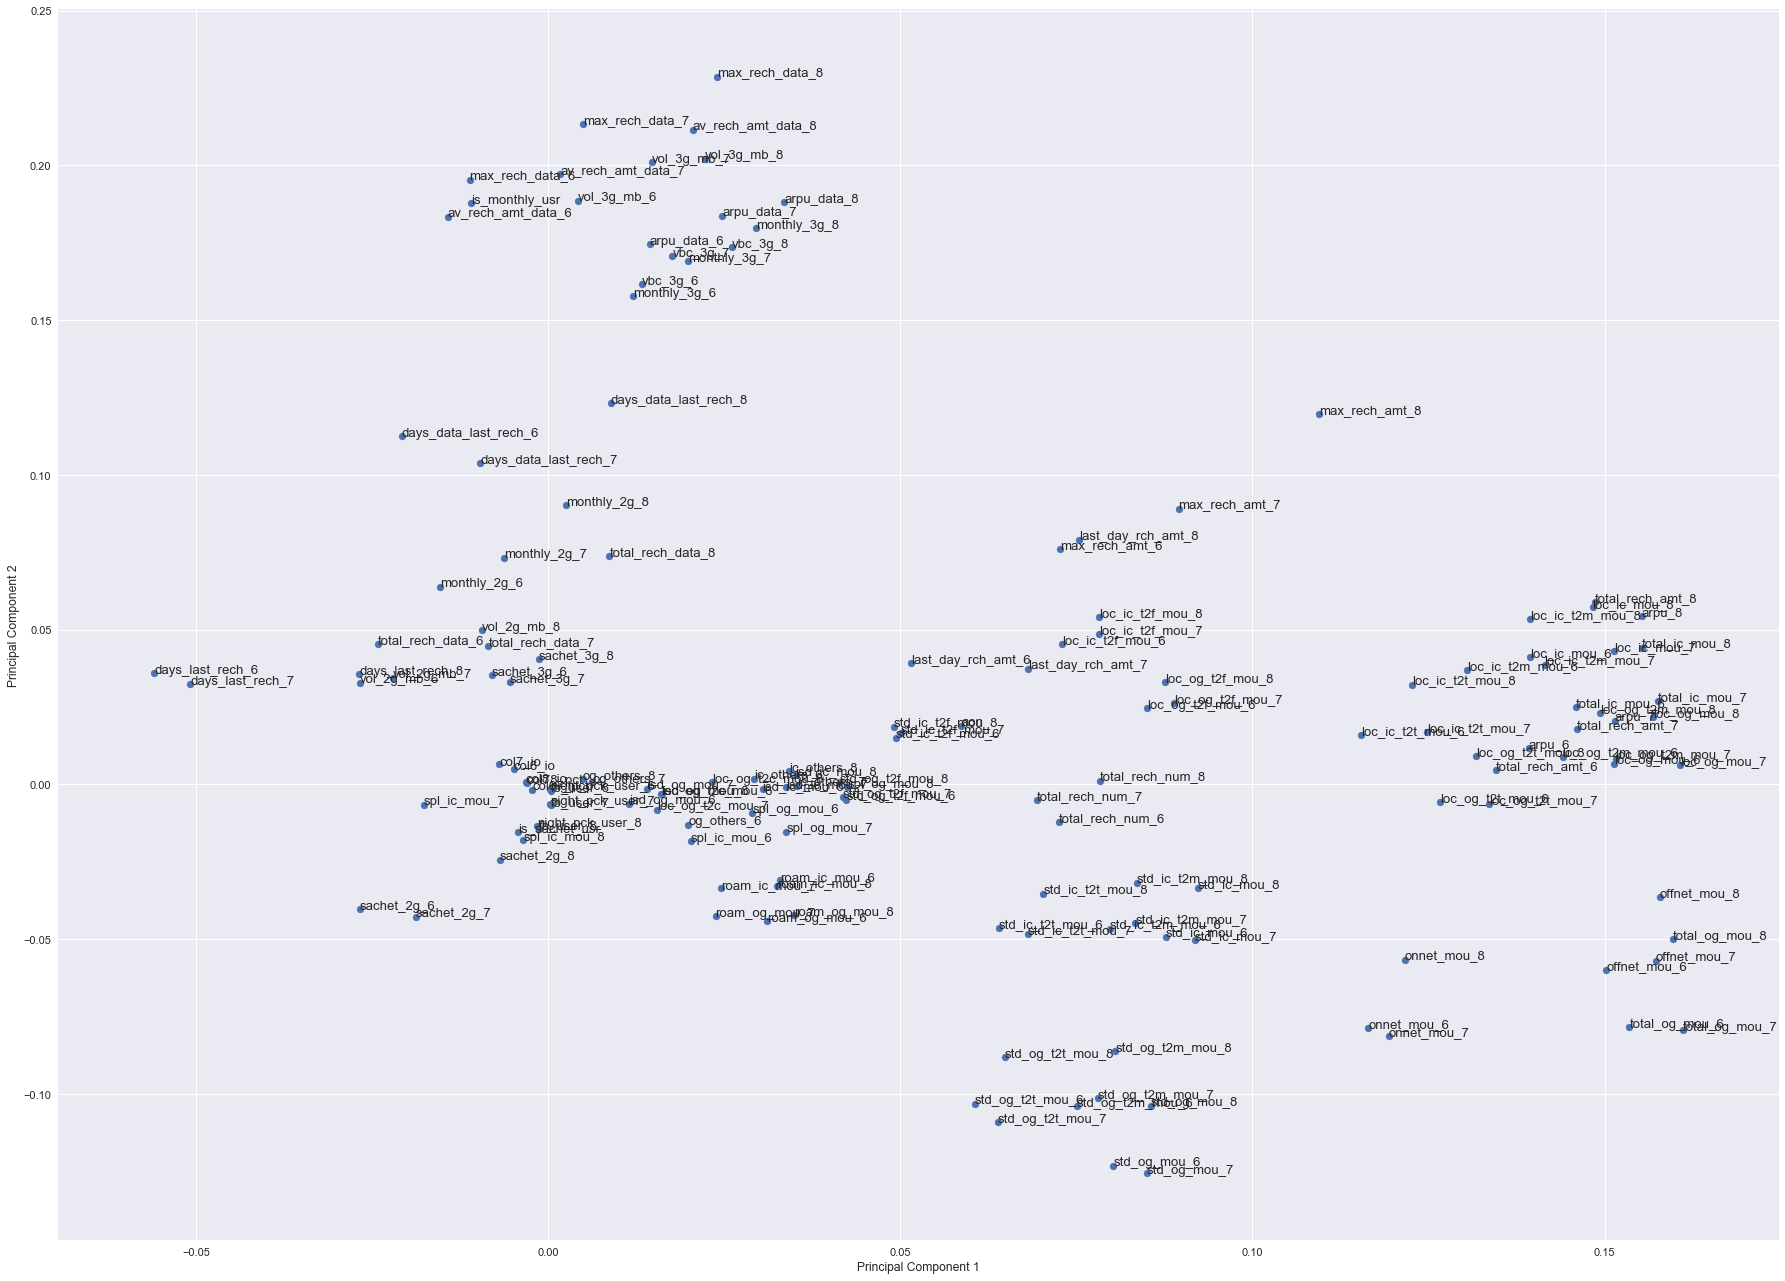

In [70]:
#Lets plot all the points of first and second Principal component
fig = plt.figure(figsize = (25,18))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()

#### PCA inference
#### We can see the first componenent is in the direction of total_rech_amt
#### The second component is in the direction of max_rech_amt_8

#### This components will also have the highest of the loading
#### After using principal component analysis using SVD solver
#### from top right quadrant of PC1 vs PC2 plot, we find that the following features have high influence on churn among high value customers.

#### max_rech_amt_8
#### total_ic_mou_8
#### local_ic_mou_7
#### total_rech_amt_8
#### arpu_7
#### total_rech_amt_7
#### Local_og_mou8 

In [71]:
### Lets print the PCA variance ratio
pca.explained_variance_ratio_

array([  1.56886407e-01,   7.40945822e-02,   5.77055583e-02,
         4.76866186e-02,   2.94273293e-02,   2.69308791e-02,
         2.49549484e-02,   2.05661252e-02,   1.85765413e-02,
         1.74336520e-02,   1.65166143e-02,   1.51679074e-02,
         1.44217537e-02,   1.29724880e-02,   1.26602475e-02,
         1.24069056e-02,   1.15281306e-02,   1.12926890e-02,
         1.03414113e-02,   9.89489196e-03,   9.58850605e-03,
         9.33279372e-03,   8.82989866e-03,   8.58085373e-03,
         8.25834631e-03,   8.11613494e-03,   7.98982078e-03,
         7.84489094e-03,   7.55434233e-03,   7.52425485e-03,
         7.43931893e-03,   7.39563856e-03,   6.97590904e-03,
         6.85498215e-03,   6.77243861e-03,   6.47270937e-03,
         6.43130697e-03,   6.41327282e-03,   6.25812364e-03,
         6.21115831e-03,   5.84101941e-03,   5.70734080e-03,
         5.44621047e-03,   5.40139936e-03,   5.13842961e-03,
         5.12569490e-03,   5.04135182e-03,   4.92950073e-03,
         4.72143290e-03,

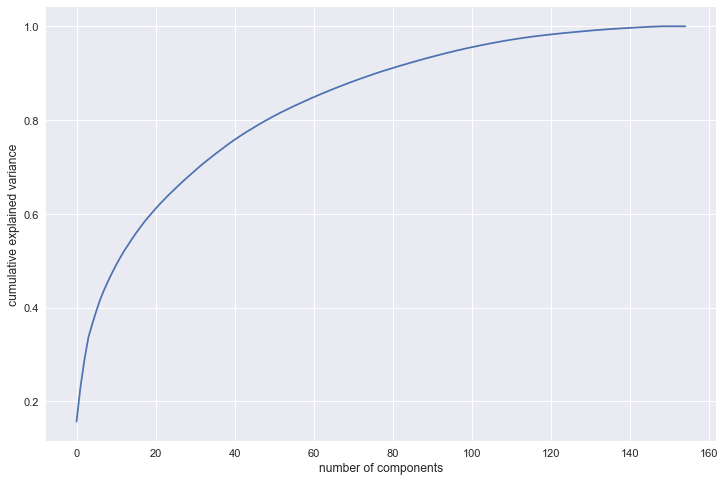

In [72]:
#Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)


#### The scree plot indicates that by using 80 components we will be able to describe 90% of variance

In [73]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components=80)

In [74]:
df_train_pca = pca_final.fit_transform(x_res)
df_train_pca.shape

(24071L, 80L)

In [75]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

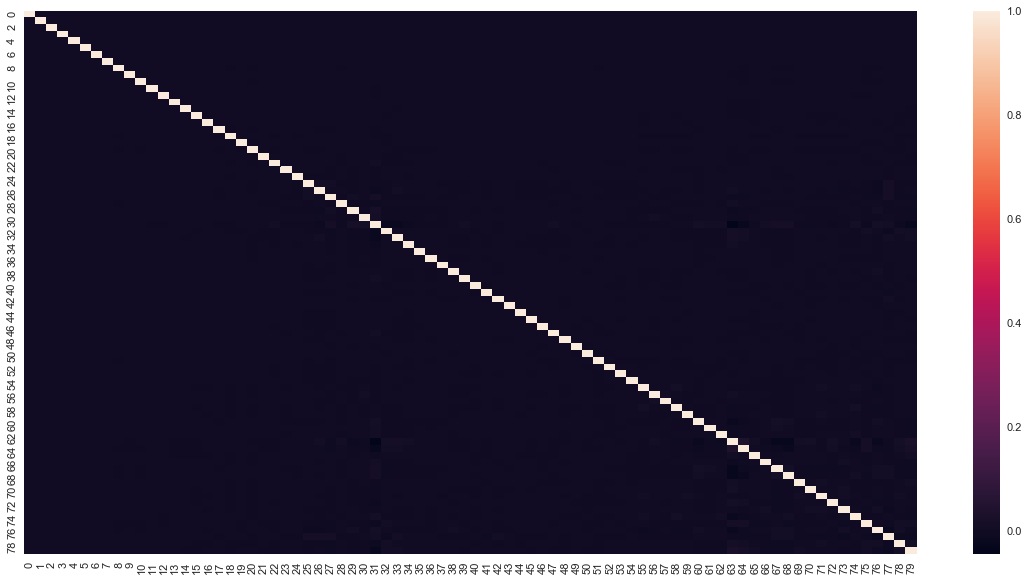

In [76]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
#sns.heatmap(corrmat, annot=True)
sns.heatmap(corrmat)

In [77]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

('max corr:', 0.039749371681845447, ', min corr: ', -0.045254878791061597)


#### We see that correlations are indeed very close to 0

In [78]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8985L, 80L)

### Logistic Regression on Principle components

In [79]:
#Training the model on the train data
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_res)

In [80]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

auc_roc = "{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test, columns = ['Churn_Prob'])
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
# Let's see the head
y_pred_1.head()

Churn_Prob
0        0.00
1        0.57
2        0.01
3        0.01
4        0.58

In [81]:
#### Converting the ytest to DF
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
88973      0
28808      0
33082      0
77666      0
50624      0

In [82]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

churn  Churn_Prob
0      0        0.00
1      0        0.57
2      0        0.01
3      0        0.01
4      0        0.58

In [83]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

churn  Churn_Prob  predicted
0      0        0.00          0
1      0        0.57          1
2      0        0.01          0
3      0        0.01          0
4      0        0.58          1

In [84]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[7778,  476],
       [ 250,  481]], dtype=int64)

In [85]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9191986644407345

#### The overall accuracy of 91% looks good but lets look at other evaluation metrics

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    return fpr, tpr, thresholds

(array([ 0.        ,  0.05766901,  1.        ]),
 array([ 0.        ,  0.65800274,  1.        ]),
 array([2, 1, 0], dtype=int64))

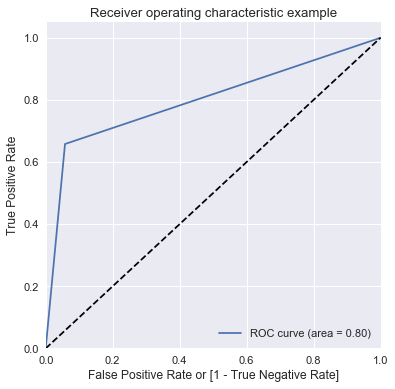

In [87]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0        0.00          0    1    0    0    0    0    0    0    0    0   
1      0        0.57          1    1    1    1    1    1    1    0    0    0   
2      0        0.01          0    1    0    0    0    0    0    0    0    0   
3      0        0.01          0    1    0    0    0    0    0    0    0    0   
4      0        0.58          1    1    1    1    1    1    1    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
min_prod  = 1.0
optimum_prob = 0.0 
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1]).astype(float)/total1
    sensi = cm1[0,0].astype(float) /(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1].astype(float) /(cm1[1,0]+cm1[1,1])
    prod = abs((accuracy - sensi) * (accuracy - speci ) * (speci - sensi))
    if min_prod > prod:
        optimum_prob = i
        min_prod = prod
        
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
print(optimum_prob)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   0.00   1.00
0.10  0.10      0.73   0.72   0.90
0.20  0.20      0.83   0.83   0.84
0.30  0.30      0.88   0.88   0.78
0.40  0.40      0.90   0.92   0.73
0.50  0.50      0.92   0.94   0.66
0.60  0.60      0.93   0.97   0.58
0.70  0.70      0.93   0.98   0.40
0.80  0.80      0.93   0.99   0.20
0.90  0.90      0.92   1.00   0.05
0.2


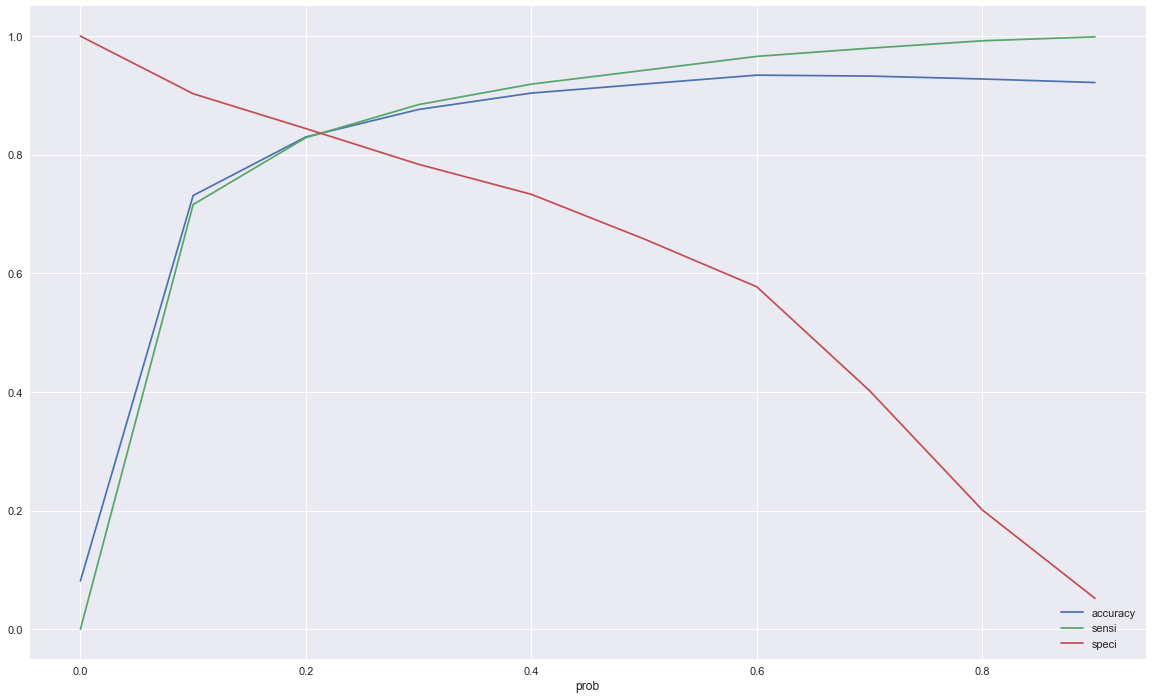

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(True)

In [91]:
print("Looks like the optimum threshold for classification is", optimum_prob )

('Looks like the optimum threshold for classification is', 0.2)


#### Using the optimum probability Thres

In [92]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > optimum_prob else 0)

In [93]:
#Let's check the overall accuracy.
print(metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted))

### Let's build confusion matrix
cm2 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

#### Let's cacluate the accuracy, sensitivity and specificity
total1=sum(sum(cm2))
accuracy = (cm2[0,0]+cm2[1,1]).astype(float)/total1
sensi = cm2[0,0].astype(float) /(cm2[0,0]+cm2[0,1])
speci = cm2[1,1].astype(float) /(cm2[1,0]+cm2[1,1])
print(accuracy, sensi ,speci)

0.830050083472
(0.83005008347245413, 0.82881027380663919, 0.84404924760601918)


In [94]:
### Let's keep the model evaluation parameters for future use
LR_PCA_perf = ['LogisticRegression', accuracy, sensi, speci, auc_roc]

### Random forest on Principle components

In [95]:
#### Define x train and y train and x test and y test
X_rf_train = df_train_pca 
X_rf_test  = df_test_pca
y_rf_train = y_res
y_rf_test  = y_test

In [96]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_rf_train,y_rf_train)
# Making predictions
predictions = rfc.predict(X_rf_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      8254
          1       0.60      0.28      0.38       731

avg / total       0.91      0.93      0.91      8985



In [97]:
# Confusion matrix for default random forest
cm_rf_default = confusion_matrix(y_rf_test,predictions)
print(cm_rf_default)

[[8117  137]
 [ 529  202]]


In [98]:
### Let's calculate other scores and print them
total1=sum(sum(cm_rf_default))
accuracy = (cm_rf_default[0,0]+cm_rf_default[1,1]).astype(float)/total1
sensi = cm_rf_default[0,0].astype(float) /(cm_rf_default[0,0]+cm_rf_default[0,1])
speci = cm_rf_default[1,1].astype(float) /(cm_rf_default[1,0]+cm_rf_default[1,1])
print(accuracy, sensi ,speci)

(0.92587646076794661, 0.9834019869154349, 0.27633378932968539)


Specificity is so low that it means there are too many false positives and high bias. Lets see if we can improve the specificity by tuning hyperparameters

#### Tuning max_depth


In [99]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 35, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 7, 12, 17, 22, 27, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [100]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           0.33             0.01             0.80              0.80   
1           0.93             0.01             0.85              0.87   
2           1.54             0.01             0.90              0.96   
3           1.70             0.01             0.92              0.99   
4           1.65             0.01             0.91              0.99   

  param_max_depth              params  rank_test_score  split0_test_score  \
0               2   {u'max_depth': 2}                7               0.80   
1               7   {u'max_depth': 7}                6               0.84   
2              12  {u'max_depth': 12}                5               0.89   
3              17  {u'max_depth': 17}                1               0.91   
4              22  {u'max_depth': 22}                3               0.91   

   split0_train_score  split1_test_score  split1_train_score  \
0                0.80               0.80                0.80   
1                0.87               0.84                0.86   
2                0.96               0.89                0.96   
3                0.99               0.90                0.99   
4                0.99               0.90                0.99   

   split2_test_score  split2_train_score  split3_test_score  \
0               0.80                0.80               0.80   
1               0.87                0.87               0.86   
2               0.91                0.96               0.90   
3               0.93                0.99               0.92   
4               0.92                0.99               0.92   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0                0.80               0.80                0.80          0.01   
1                0.87               0.85                0.86          0.03   
2                0.95               0.91                0.95          0.15   
3                0.99               0.92                0.99          0.20   
4                0.99               0.92                0.99          0.13   

   std_score_time  std_test_score  std_train_score  
0            0.00            0.00             0.00  
1            0.00            0.01             0.00  
2            0.00            0.01             0.00  
3            0.00            0.01             0.00  
4            0.00            0.01             0.00

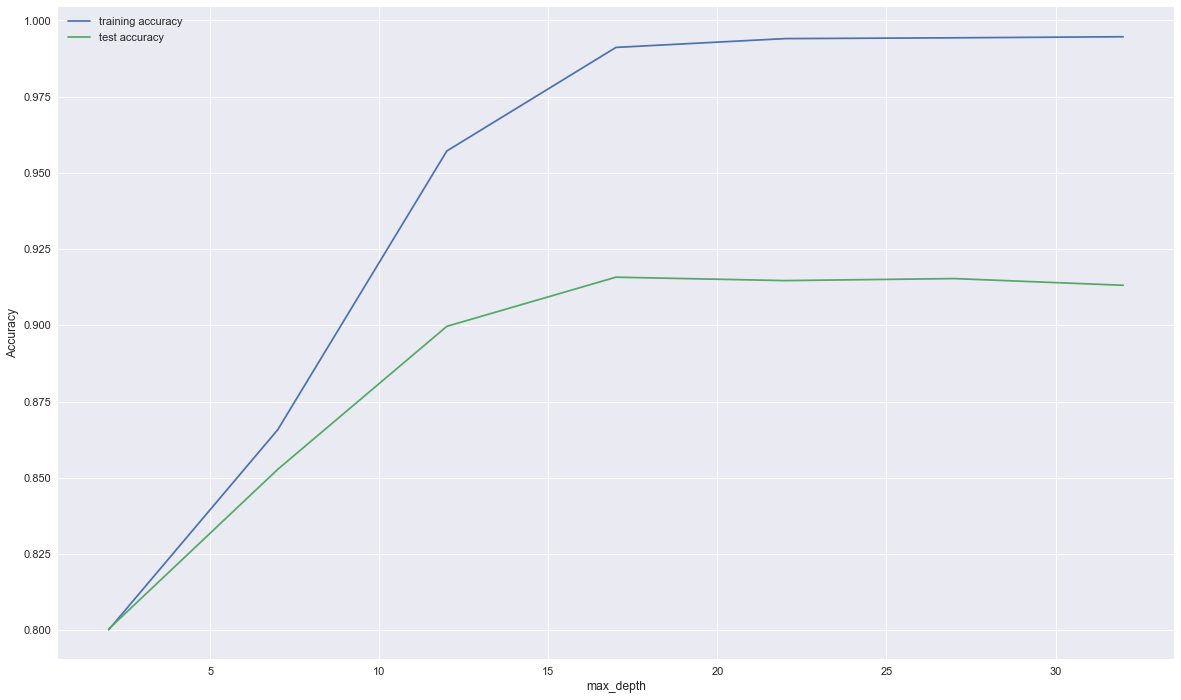

In [101]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

Seems like the accuracy max out near about max depth of 20. While the increase in accuracy slows down near 16. So lets keep the max depth as 17

#### Tuning n_estimators

In [102]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 20, 5)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=16)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 6, 11, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [103]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           0.17             0.00             0.83              0.93   
1           0.90             0.01             0.90              0.98   
2           1.60             0.01             0.92              0.99   
3           2.33             0.02             0.92              0.99   

  param_n_estimators                 params  rank_test_score  \
0                  1   {u'n_estimators': 1}                4   
1                  6   {u'n_estimators': 6}                3   
2                 11  {u'n_estimators': 11}                2   
3                 16  {u'n_estimators': 16}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.83                0.93               0.82   
1               0.90                0.98               0.89   
2               0.91                0.99               0.90   
3               0.91                0.99               0.91   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.93               0.84                0.93   
1                0.98               0.91                0.98   
2                0.99               0.93                0.99   
3                0.99               0.93                0.99   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.83                0.92               0.84   
1               0.91                0.98               0.91   
2               0.92                0.99               0.93   
3               0.92                0.99               0.93   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.92          0.02            0.00            0.01   
1                0.98          0.04            0.00            0.01   
2                0.99          0.05            0.00            0.01   
3                0.99          0.07            0.00            0.01   

   std_train_score  
0             0.01  
1             0.00  
2             0.00  
3             0.00

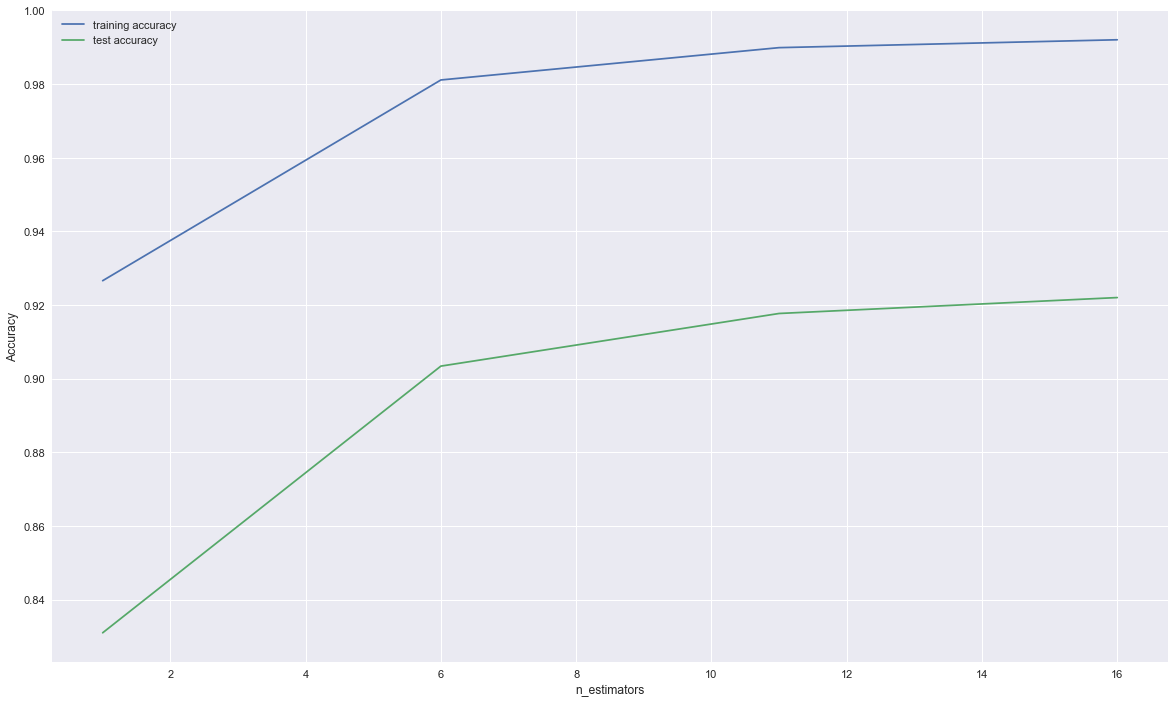

In [104]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()


The best test acuracy seems to be at 11 estimators

#### Tuning max_features

In [105]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=16)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [106]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           0.39             0.01             0.95              0.99   
1           0.76             0.01             0.95              0.99   
2           1.20             0.01             0.95              0.99   
3           1.65             0.01             0.95              0.99   
4           1.99             0.01             0.95              0.99   

  param_max_features                 params  rank_test_score  \
0                  4   {u'max_features': 4}                4   
1                  8   {u'max_features': 8}                2   
2                 14  {u'max_features': 14}                3   
3                 20  {u'max_features': 20}                1   
4                 24  {u'max_features': 24}                5   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.95                0.98               0.95   
1               0.95                0.99               0.95   
2               0.95                0.99               0.95   
3               0.95                0.99               0.95   
4               0.95                0.99               0.95   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.99               0.95                0.99   
1                0.99               0.94                0.99   
2                0.99               0.94                0.99   
3                0.99               0.95                0.99   
4                0.99               0.95                0.99   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.95                0.99               0.95   
1               0.95                0.99               0.95   
2               0.95                0.99               0.95   
3               0.95                0.99               0.95   
4               0.94                0.99               0.95   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.99          0.02            0.00            0.00   
1                0.99          0.01            0.00            0.00   
2                0.99          0.07            0.00            0.00   
3                0.99          0.02            0.00            0.00   
4                0.99          0.01            0.00            0.00   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00

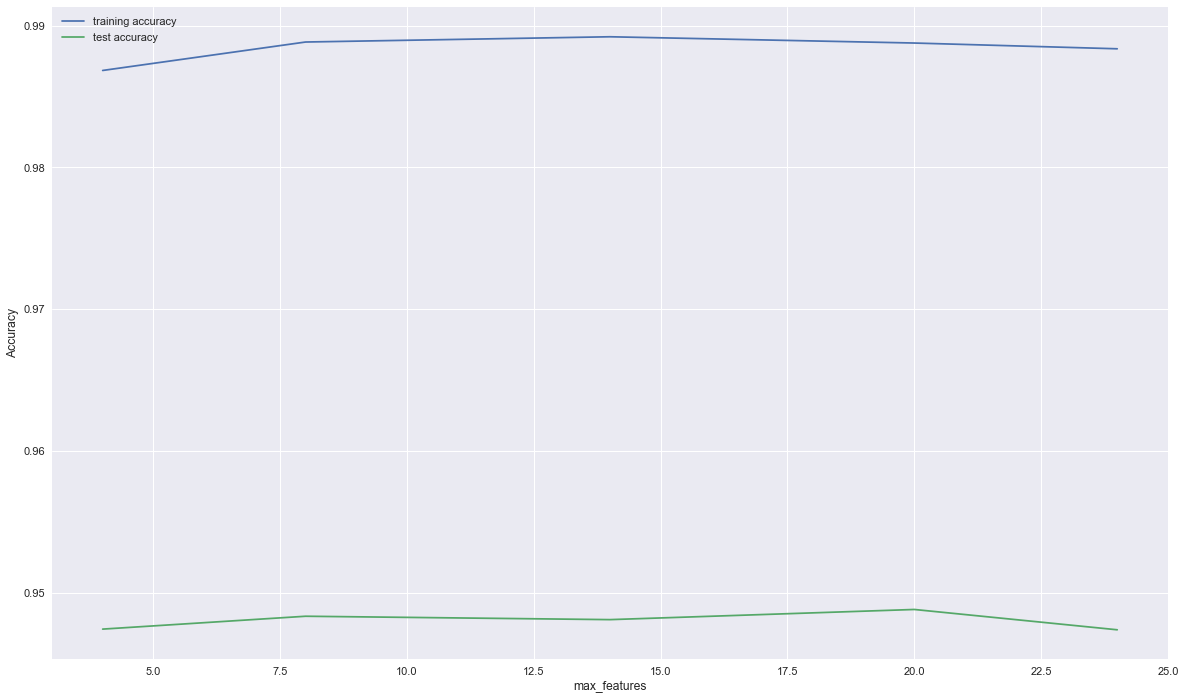

In [107]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()


Max Features doesn't matter

#### Tuning min_samples_leaf

In [108]:
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [10, 60, 110, 160, 210, 260, 310, 360]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [109]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           0.91             0.01             0.95              0.96   
1           0.70             0.01             0.95              0.95   
2           0.66             0.01             0.95              0.95   
3           0.67             0.03             0.95              0.95   
4           0.58             0.01             0.95              0.95   

  param_min_samples_leaf                      params  rank_test_score  \
0                     10   {u'min_samples_leaf': 10}                1   
1                     60   {u'min_samples_leaf': 60}                3   
2                    110  {u'min_samples_leaf': 110}                5   
3                    160  {u'min_samples_leaf': 160}                6   
4                    210  {u'min_samples_leaf': 210}                2   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.95                0.96               0.95   
1               0.95                0.95               0.95   
2               0.95                0.95               0.95   
3               0.95                0.95               0.95   
4               0.95                0.95               0.95   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.95               0.95                0.96   
1                0.95               0.95                0.95   
2                0.95               0.95                0.95   
3                0.95               0.95                0.95   
4                0.95               0.95                0.95   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.95                0.96               0.95   
1               0.95                0.95               0.95   
2               0.95                0.95               0.95   
3               0.95                0.95               0.95   
4               0.95                0.95               0.95   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.96          0.05            0.00            0.00   
1                0.95          0.03            0.00            0.00   
2                0.95          0.05            0.00            0.00   
3                0.95          0.10            0.02            0.00   
4                0.95          0.05            0.00            0.00   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00

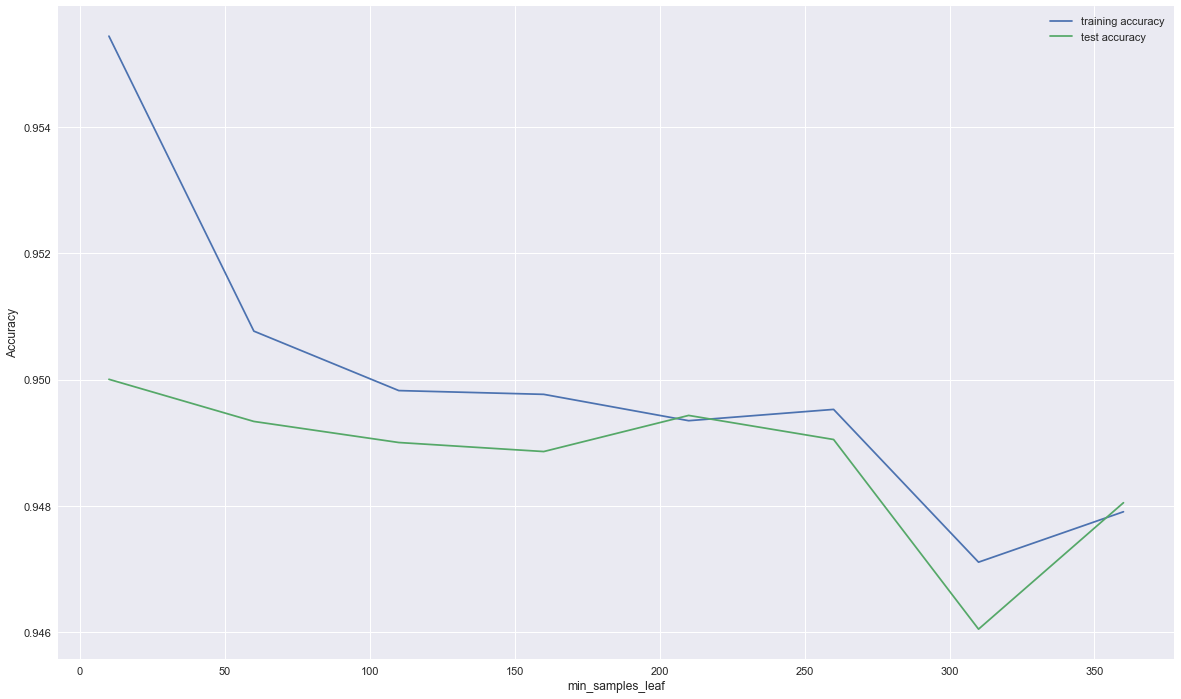

In [110]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()


#### Modeling using the parameters derived so far

In [111]:
# model with the best hyperparameters

#max depth updated to 17, amx features to 22
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=17,
                             max_features=22,
                             min_samples_leaf = 60,
                             n_estimators=11)

In [112]:
rfc.fit(X_rf_train,y_rf_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features=22, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=60, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
predictions = rfc.predict(X_rf_test)

In [114]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      8254
          1       0.59      0.45      0.51       731

avg / total       0.92      0.93      0.93      8985



In [115]:
cm_rf_fianl = confusion_matrix(y_test,predictions)

In [116]:
total1=sum(sum(cm_rf_fianl))
accuracy = (cm_rf_fianl[0,0]+cm_rf_fianl[1,1]).astype(float)/total1
sensi = cm_rf_fianl[0,0].astype(float) /(cm_rf_fianl[0,0]+cm_rf_fianl[0,1])
speci = cm_rf_fianl[1,1].astype(float) /(cm_rf_fianl[1,0]+cm_rf_fianl[1,1])
print(accuracy, sensi ,speci)

(0.92977184195882023, 0.97261933607947659, 0.44596443228454175)


In [117]:
# add roc_auc score to model perf data frame
auc_roc = "{:2.2}".format(metrics.roc_auc_score(y_test, predictions))
print(auc_roc)

0.71


In [118]:
#add roc_auc score
RF_PCA_perf = ['RandomForest', accuracy, sensi, speci, auc_roc]

So logistic regression is giving better accuracy but worse specificity in comparison to logistic regression

### Decision Tree on PCA

#### Getting the test train data ready

In [119]:
X_dt_train = df_train_pca 
X_dt_test  = df_test_pca
y_dt_train = y_res
y_dt_test  = y_test

#### First Create a default decision tree

In [120]:

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=10)
dt_default.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
# Making predictions
y_pred_default = dt_default.predict(X_dt_test)

# Printing classification report
print(classification_report(y_dt_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94      8254
          1       0.40      0.53      0.45       731

avg / total       0.91      0.90      0.90      8985



In [122]:
cm_dt_default = confusion_matrix(y_dt_test,y_pred_default)

In [123]:
total1=sum(sum(cm_dt_default))
accuracy = (cm_dt_default[0,0]+cm_dt_default[1,1]).astype(float)/total1
sensi = cm_dt_default[0,0].astype(float) /(cm_dt_default[0,0]+cm_dt_default[0,1])
speci = cm_dt_default[1,1].astype(float) /(cm_dt_default[1,0]+cm_dt_default[1,1])
print(accuracy, sensi ,speci)

(0.89693934335002778, 0.92973103949600189, 0.52667578659370728)


#### Tuning Max depth

In [124]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(3, 40,2)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_dt_train, y_dt_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [125]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           0.62             0.00             0.82              0.83   
1           1.02             0.00             0.85              0.87   
2           1.36             0.00             0.87              0.89   
3           1.67             0.00             0.87              0.92   
4           2.06             0.00             0.87              0.95   

  param_max_depth              params  rank_test_score  split0_test_score  \
0               3   {u'max_depth': 3}               19               0.82   
1               5   {u'max_depth': 5}               18               0.85   
2               7   {u'max_depth': 7}               17               0.86   
3               9   {u'max_depth': 9}                8               0.86   
4              11  {u'max_depth': 11}                3               0.87   

   split0_train_score  split1_test_score  split1_train_score  \
0                0.83               0.82                0.84   
1                0.87               0.85                0.87   
2                0.89               0.86                0.90   
3                0.93               0.87                0.92   
4                0.96               0.87                0.95   

   split2_test_score  split2_train_score  split3_test_score  \
0               0.82                0.83               0.82   
1               0.86                0.87               0.86   
2               0.88                0.89               0.87   
3               0.87                0.92               0.87   
4               0.88                0.95               0.87   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0                0.83               0.83                0.83          0.01   
1                0.87               0.85                0.86          0.04   
2                0.89               0.86                0.89          0.05   
3                0.92               0.87                0.92          0.02   
4                0.95               0.88                0.95          0.14   

   std_score_time  std_test_score  std_train_score  
0            0.00            0.00             0.00  
1            0.00            0.00             0.00  
2            0.00            0.01             0.00  
3            0.00            0.00             0.00  
4            0.00            0.00             0.00

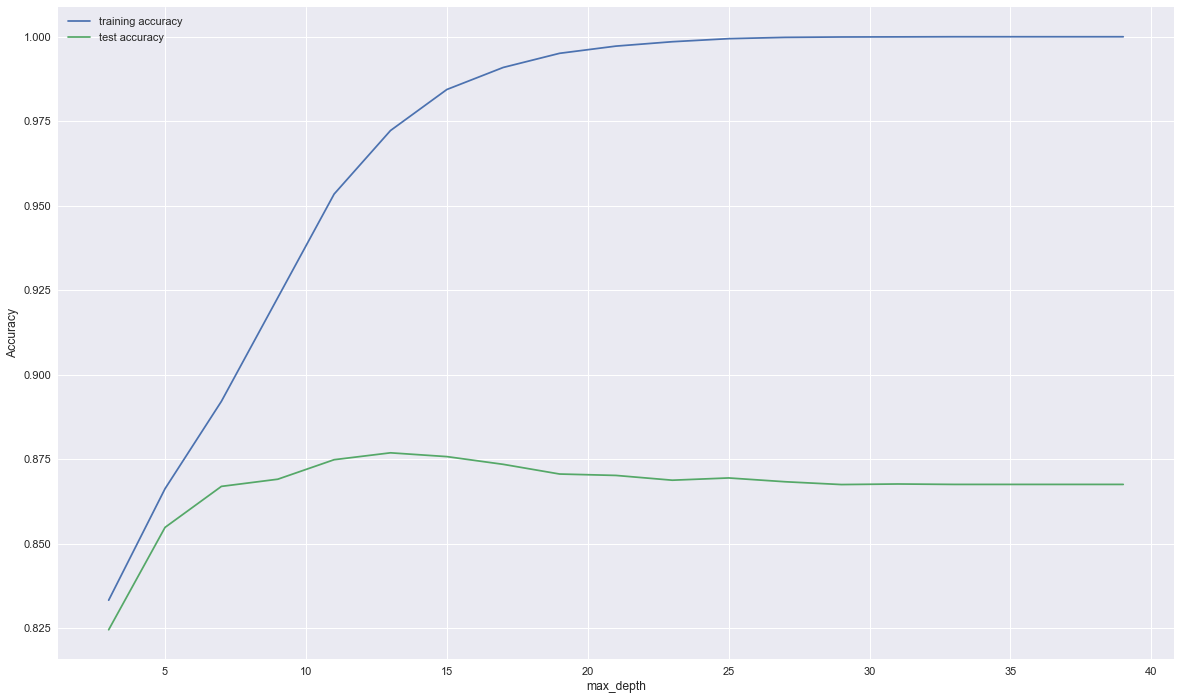

In [126]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


So at max depth of 12 we get acuracy of more than 87 % and after the growth in accuracy slows down

#### Tuning min_samples_leaf

In [127]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_dt_train, y_dt_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [5, 25, 45, 65, 85, 105, 125, 145, 165, 185]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [128]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           2.46             0.00             0.87              0.96   
1           2.03             0.00             0.87              0.91   
2           1.87             0.00             0.87              0.89   
3           1.85             0.00             0.86              0.88   
4           1.79             0.00             0.86              0.88   

  param_min_samples_leaf                     params  rank_test_score  \
0                      5   {u'min_samples_leaf': 5}                1   
1                     25  {u'min_samples_leaf': 25}                2   
2                     45  {u'min_samples_leaf': 45}                3   
3                     65  {u'min_samples_leaf': 65}                4   
4                     85  {u'min_samples_leaf': 85}                5   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.87                0.96               0.87   
1               0.86                0.91               0.86   
2               0.86                0.90               0.86   
3               0.86                0.88               0.86   
4               0.85                0.88               0.85   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.96               0.88                0.96   
1                0.91               0.88                0.90   
2                0.90               0.88                0.89   
3                0.88               0.87                0.88   
4                0.88               0.87                0.87   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.87                0.96               0.87   
1               0.87                0.90               0.87   
2               0.86                0.89               0.86   
3               0.86                0.88               0.87   
4               0.86                0.87               0.86   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.96          0.07            0.00            0.00   
1                0.91          0.04            0.00            0.01   
2                0.89          0.05            0.00            0.01   
3                0.88          0.07            0.00            0.01   
4                0.88          0.16            0.00            0.01   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00

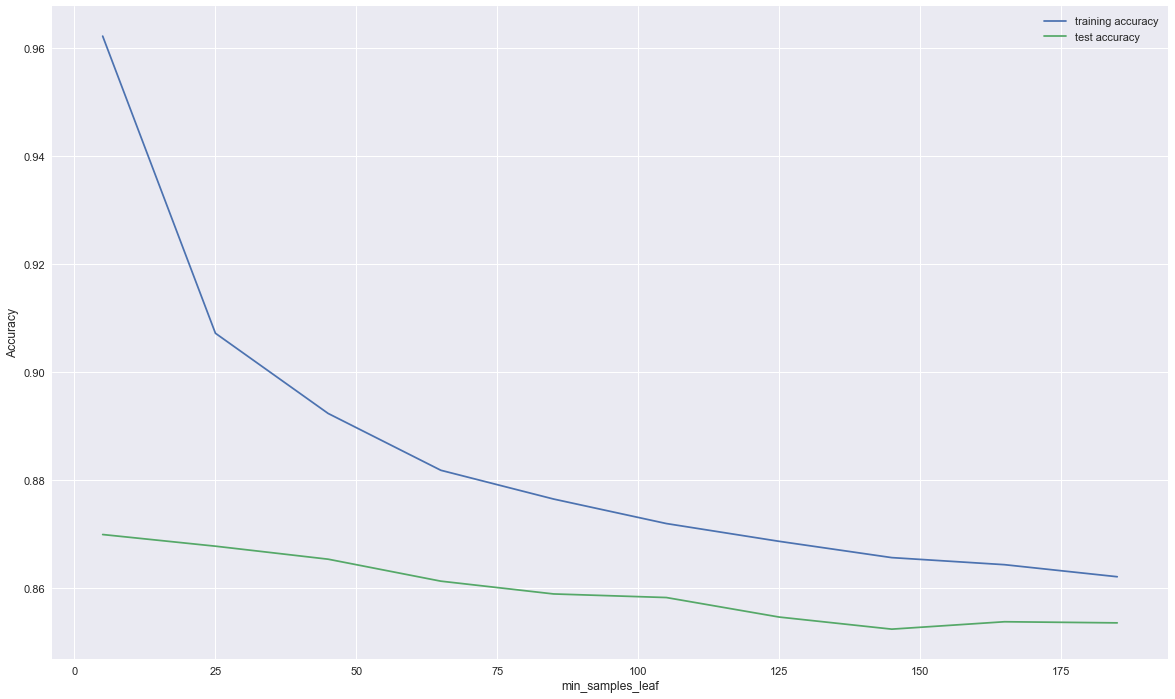

In [129]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)



#### Tuning min_samples_split

In [130]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_dt_train, y_dt_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [5, 25, 45, 65, 85, 105, 125, 145, 165, 185]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [131]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           2.98             0.00             0.87              0.99   
1           2.87             0.00             0.86              0.95   
2           2.91             0.00             0.86              0.93   
3           2.99             0.00             0.86              0.92   
4           3.07             0.00             0.86              0.91   

  param_min_samples_split                      params  rank_test_score  \
0                       5   {u'min_samples_split': 5}                1   
1                      25  {u'min_samples_split': 25}                2   
2                      45  {u'min_samples_split': 45}                3   
3                      65  {u'min_samples_split': 65}                5   
4                      85  {u'min_samples_split': 85}                4   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.87                0.99               0.86   
1               0.86                0.96               0.85   
2               0.85                0.94               0.85   
3               0.85                0.92               0.85   
4               0.85                0.92               0.85   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.99               0.87                0.99   
1                0.96               0.87                0.95   
2                0.94               0.87                0.93   
3                0.92               0.87                0.92   
4                0.92               0.88                0.91   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.87                0.99               0.87   
1               0.87                0.95               0.87   
2               0.86                0.93               0.86   
3               0.86                0.92               0.86   
4               0.86                0.91               0.87   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.99          0.16            0.00            0.00   
1                0.95          0.03            0.00            0.01   
2                0.93          0.15            0.00            0.01   
3                0.92          0.07            0.00            0.01   
4                0.91          0.33            0.00            0.01   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00

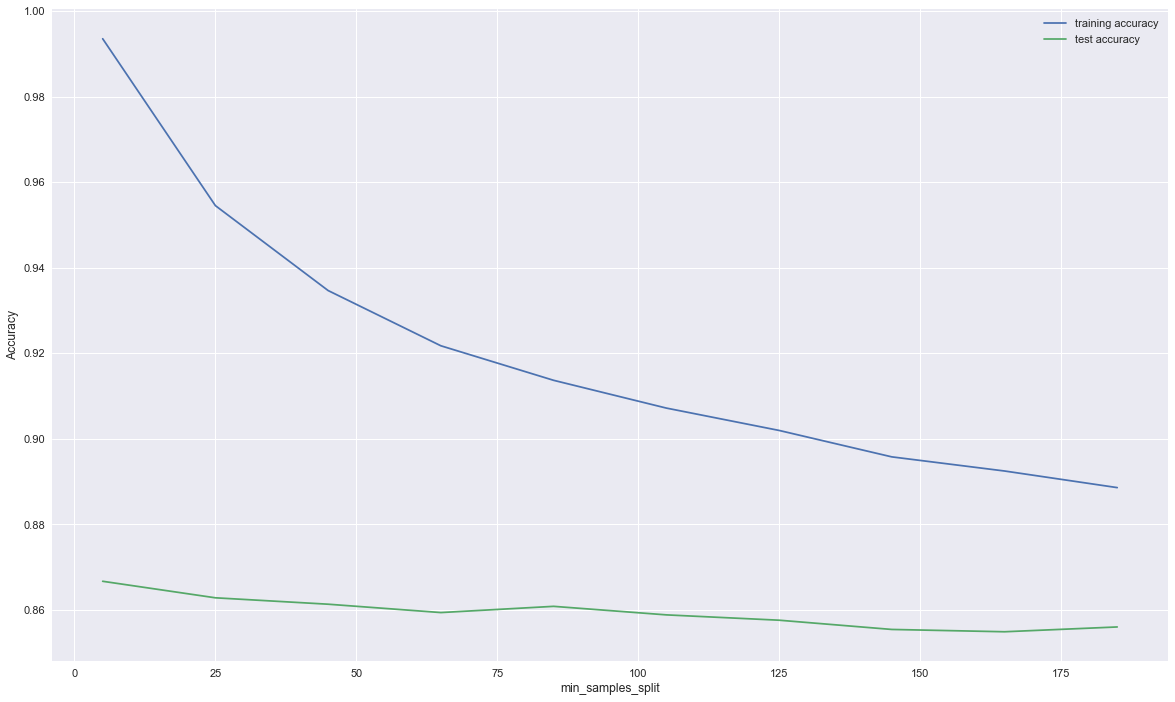

In [132]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


#### Grid Search to Find Optimal Hyperparameters

In [133]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_dt_train, y_dt_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [50, 100], 'criterion': ['entropy', 'gini'], 'max_depth': [5, 10, 15], 'min_samples_leaf': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [134]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0            1.76             0.00             0.85              0.86   
1            1.81             0.00             0.85              0.86   
2            1.83             0.00             0.85              0.86   
3            1.71             0.00             0.85              0.86   
4            2.79             0.00             0.86              0.89   
5            2.98             0.00             0.86              0.89   
6            2.50             0.00             0.86              0.87   
7            2.49             0.00             0.86              0.87   
8            2.88             0.00             0.86              0.89   
9            2.90             0.00             0.86              0.89   
10           2.55             0.00             0.86              0.88   
11           2.49             0.00             0.86              0.88   
12           1.01             0.00             0.85              0.86   
13           1.10             0.00             0.85              0.86   
14           1.09             0.00             0.85              0.86   
15           1.09             0.00             0.85              0.86   
16           1.81             0.00             0.86              0.89   
17           1.68             0.00             0.86              0.89   
18           1.63             0.00             0.86              0.87   
19           1.75             0.00             0.86              0.87   
20           2.20             0.00             0.86              0.89   
21           1.98             0.00             0.86              0.89   
22           1.84             0.00             0.86              0.87   
23           1.67             0.00             0.86              0.87   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8          entropy              15                     50   
9          entropy              15                     50   
10         entropy              15                    100   
11         entropy              15                    100   
12            gini               5                     50   
13            gini               5                     50   
14            gini               5                    100   
15            gini               5                    100   
16            gini              10                     50   
17            gini              10                     50   
18            gini              10                    100   
19            gini              10                    100   
20            gini              15                     50   
21            gini              15                     50   
22            gini              15                    100   
23            gini              15                    100   

   param_min_samples_split  \
0                       50   
1                      100   
2                       50   
3                      100   
4                       50   
5                      100   
6                       50   
7                      100   
8                       50   
9                      100   
10                      50   
11                     100   
12                      50   
13                     100   
14                      50   
15                     100   
16                      50   
17                     100   
18                      50   
19                     100   
20                    

In [135]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

('best accuracy', 0.86315483361721579)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [136]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=12, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [137]:
# Making predictions
# changed model variable
y_pred_dt_final = clf_gini.predict(X_dt_test)

# Printing classification report
print(classification_report(y_dt_test, y_pred_dt_final))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95      8254
          1       0.43      0.52      0.47       731

avg / total       0.91      0.91      0.91      8985



In [138]:
cm_dt_final = confusion_matrix(y_dt_test,y_pred_dt_final)

In [139]:
total1=sum(sum(cm_dt_final))
accuracy = (cm_dt_final[0,0]+cm_dt_final[1,1]).astype(float)/total1
sensi = cm_dt_final[0,0].astype(float) /(cm_dt_final[0,0]+cm_dt_final[0,1])
speci = cm_dt_final[1,1].astype(float) /(cm_dt_final[1,0]+cm_dt_final[1,1])
print("accuracy, sensi ,speci", accuracy, sensi ,speci)

('accuracy, sensi ,speci', 0.90550918196994989, 0.9397867700508844, 0.51846785225718195)


In [140]:
# add roc_auc score to model perf data frame
auc_roc = "{:2.2}".format(metrics.roc_auc_score(y_dt_test, y_pred_dt_final))

In [141]:

# added roc_auc score
DT_PCA_perf = ['DecisionTree', accuracy, sensi, speci, auc_roc]

### XGBoost on PCA data

#### Getting the training and test data for XGBoost Algo

In [142]:
X_xgb_train = df_train_pca 
X_xgb_test  = df_test_pca
y_xgb_train = y_res
y_xgb_test  = y_test

In [143]:
# fit model on training data with default hyperparameters
xg_model_default = XGBClassifier()
xg_model_default.fit(X_xgb_train, y_xgb_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

#### Predicting using default model

In [144]:
# Making predictions
y_pred_default = dt_default.predict(X_dt_test)

# Printing classification report
print(classification_report(y_xgb_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94      8254
          1       0.40      0.53      0.45       731

avg / total       0.91      0.90      0.90      8985



In [145]:
cm_xgb_default = confusion_matrix(y_xgb_test,y_pred_default)

In [146]:
total1=sum(sum(cm_xgb_default))
accuracy = (cm_xgb_default[0,0]+cm_xgb_default[1,1]).astype(float)/total1
sensi = cm_xgb_default[0,0].astype(float) /(cm_xgb_default[0,0]+cm_xgb_default[0,1])
speci = cm_xgb_default[1,1].astype(float) /(cm_xgb_default[1,0]+cm_xgb_default[1,1])
print("accuracy, sensi ,speci",accuracy, sensi ,speci)

('accuracy, sensi ,speci', 0.89693934335002778, 0.92973103949600189, 0.52667578659370728)


#### Tuning parameters for model

In [147]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model_tunned = XGBClassifier(max_depth=2, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model_tunned, 
                        param_grid = param_grid, 
                        scoring= "accuracy", 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [148]:
# fit the model
model_cv.fit(X_xgb_train, y_xgb_train)  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   58.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.3, 0.6, 0.9], 'learning_rate': [0.2, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [149]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           1.72             0.01             0.89              0.91   
1           1.98             0.01             0.89              0.91   
2           2.08             0.01             0.89              0.91   
3           1.46             0.01             0.89              0.91   
4           2.02             0.01             0.90              0.92   
5           2.01             0.01             0.90              0.93   

  param_learning_rate param_subsample  \
0                0.20            0.30   
1                0.20            0.60   
2                0.20            0.90   
3                0.60            0.30   
4                0.60            0.60   
5                0.60            0.90   

                                       params  rank_test_score  \
0  {u'subsample': 0.3, u'learning_rate': 0.2}                4   
1  {u'subsample': 0.6, u'learning_rate': 0.2}                5   
2  {u'subsample': 0.9, u'learning_rate': 0.2}                3   
3  {u'subsample': 0.3, u'learning_rate': 0.6}                6   
4  {u'subsample': 0.6, u'learning_rate': 0.6}                2   
5  {u'subsample': 0.9, u'learning_rate': 0.6}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.88                0.91               0.89   
1               0.88                0.91               0.89   
2               0.89                0.91               0.89   
3               0.88                0.91               0.88   
4               0.89                0.93               0.89   
5               0.89                0.93               0.89   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.91               0.90                0.90   
1                0.91               0.90                0.90   
2                0.91               0.90                0.91   
3                0.91               0.89                0.91   
4                0.93               0.91                0.92   
5                0.93               0.91                0.92   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.90                0.90               0.90   
1               0.90                0.90               0.90   
2               0.90                0.90               0.90   
3               0.89                0.91               0.89   
4               0.90                0.92               0.90   
5               0.90                0.92               0.91   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.90          0.37            0.01            0.01   
1                0.90          0.11            0.00            0.01   
2                0.90          0.12            0.00            0.01   
3                0.91          0.11            0.00            0.01   
4                0.92          0.18            0.00            0.01   
5                0.92          0.18            0.00            0.01   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00  
5             0.00

In [150]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           1.72             0.01             0.89              0.91   
1           1.98             0.01             0.89              0.91   
2           2.08             0.01             0.89              0.91   
3           1.46             0.01             0.89              0.91   
4           2.02             0.01             0.90              0.92   

   param_learning_rate param_subsample  \
0                 0.20            0.30   
1                 0.20            0.60   
2                 0.20            0.90   
3                 0.60            0.30   
4                 0.60            0.60   

                                       params  rank_test_score  \
0  {u'subsample': 0.3, u'learning_rate': 0.2}                4   
1  {u'subsample': 0.6, u'learning_rate': 0.2}                5   
2  {u'subsample': 0.9, u'learning_rate': 0.2}                3   
3  {u'subsample': 0.3, u'learning_rate': 0.6}                6   
4  {u'subsample': 0.6, u'learning_rate': 0.6}                2   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.88                0.91               0.89   
1               0.88                0.91               0.89   
2               0.89                0.91               0.89   
3               0.88                0.91               0.88   
4               0.89                0.93               0.89   

   split1_train_score  split2_test_score  split2_train_score  \
0                0.91               0.90                0.90   
1                0.91               0.90                0.90   
2                0.91               0.90                0.91   
3                0.91               0.89                0.91   
4                0.93               0.91                0.92   

   split3_test_score  split3_train_score  split4_test_score  \
0               0.90                0.90               0.90   
1               0.90                0.90               0.90   
2               0.90                0.90               0.90   
3               0.89                0.91               0.89   
4               0.90                0.92               0.90   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0                0.90          0.37            0.01            0.01   
1                0.90          0.11            0.00            0.01   
2                0.90          0.12            0.00            0.01   
3                0.91          0.11            0.00            0.01   
4                0.92          0.18            0.00            0.01   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00

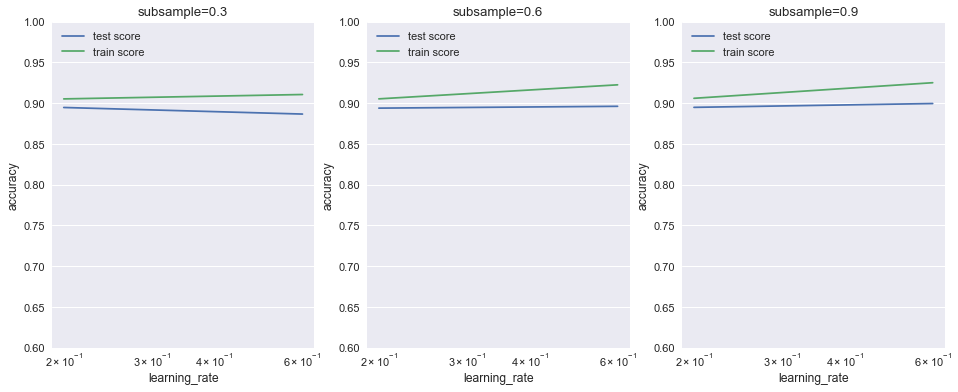

In [151]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('accuracy')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

### Building final XGboost Model

In [152]:
model_xgb_final = XGBClassifier(max_depth = 2, learning_rate = 0.6,n_estimators = 100,subsample = 0.6)
model_xgb_final.fit(X_xgb_train, y_xgb_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.6, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6)

In [153]:
# predict
y_pred_fianl = model_xgb_final.predict(X_xgb_test)

In [154]:
# Printing classification report
print(classification_report(y_xgb_test, y_pred_fianl))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96      8254
          1       0.52      0.60      0.56       731

avg / total       0.93      0.92      0.92      8985



In [155]:
cm_xgb_final = confusion_matrix(y_xgb_test,y_pred_fianl)

In [156]:
total1=sum(sum(cm_xgb_final))
accuracy = (cm_xgb_final[0,0]+cm_xgb_final[1,1]).astype(float)/total1
sensi = cm_xgb_final[0,0].astype(float) /(cm_xgb_final[0,0]+cm_xgb_final[0,1])
speci = cm_xgb_final[1,1].astype(float) /(cm_xgb_final[1,0]+cm_xgb_final[1,1])
print("accuracy, sensi ,speci",accuracy, sensi ,speci)

('accuracy, sensi ,speci', 0.922426265998887, 0.95117518778773924, 0.5978112175102599)


In [157]:
#: add roc_auc score to model perf data frame
auc_roc = "{:2.2}".format(metrics.roc_auc_score(y_xgb_test, y_pred_fianl))

In [158]:
# added roc_auc score
XG_PCA_perf = ['XGboost', accuracy, sensi, speci, auc_roc]

### plot comparing all models across KPIs on PCA data

In [159]:
# include Roc_auc score
model_perf_cols = ["model","accuracy","sensitivity","specificity","auc_roc"]

model_perf_rows = []
model_perf_rows.append(RF_PCA_perf)
model_perf_rows.append(DT_PCA_perf)
model_perf_rows.append(XG_PCA_perf)
model_perf_rows.append(LR_PCA_perf)
model_perf = pd.DataFrame(model_perf_rows, columns=model_perf_cols)

model_perf.head()
#model_perf.to_csv("model_perf.csv", index=False)

model  accuracy  sensitivity  specificity auc_roc
0        RandomForest      0.93         0.97         0.45    0.71
1        DecisionTree      0.91         0.94         0.52    0.73
2             XGboost      0.92         0.95         0.60    0.77
3  LogisticRegression      0.83         0.83         0.84    0.91

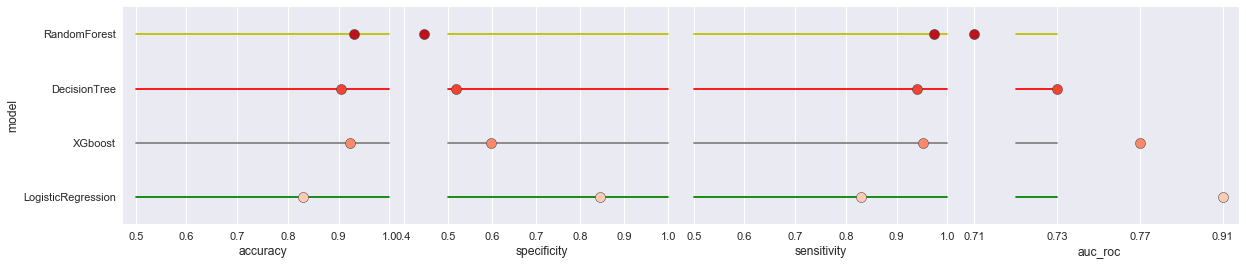

In [160]:

fig, axes = plt.subplots(1,4,sharey='row', figsize=(20, 4))

#todo: optimize to one for loop all 3 loops
myPlot = sns.stripplot(model_perf.accuracy, model_perf.model, size=10, orient="h", 
                     palette="Reds_r", edgecolor="gray", ax=axes[0], linewidth=.5)

sns.stripplot(model_perf.specificity, model_perf.model, size=10, orient="h", 
                 palette="Reds_r", edgecolor="gray", ax=axes[1], linewidth=.5)

sns.stripplot(model_perf.sensitivity, model_perf.model, size=10, orient="h", 
                     palette="Reds_r", edgecolor="gray", ax=axes[2], linewidth=.5)

sns.stripplot(model_perf.auc_roc, model_perf.model, size=10, orient="h", 
                     palette="Reds_r", edgecolor="gray", ax=axes[3], linewidth=.5)


plt.subplots_adjust(wspace=0, hspace=0)
sns.despine()

#stepsize = 0.1
#for i in range(4):    
#    axes[i].xaxis.set_ticks(np.arange(0.5, 1.1, stepsize))
#    #axes[i].set_xlim(0.3, 1)
    
for i in range(3):
    axes[i+1].set_ylabel('')
    sns.despine(left=True, ax=axes[i+1])
    
#draw horizontallines
for i in range(4):    
    axes[i].plot(np.linspace(0.5,1.0,1000), [0]*1000, 'y-')    
    axes[i].plot(np.linspace(0.5,1.0,1000), [1]*1000, 'r-')
    axes[i].plot(np.linspace(0.5,1.0,1000), [2]*1000, "gray")
    axes[i].plot(np.linspace(0.5,1.0,1000), [3]*1000, "g-")
    


In [161]:
model_perf.head()

model  accuracy  sensitivity  specificity auc_roc
0        RandomForest      0.93         0.97         0.45    0.71
1        DecisionTree      0.91         0.94         0.52    0.73
2             XGboost      0.92         0.95         0.60    0.77
3  LogisticRegression      0.83         0.83         0.84    0.91

### Best Model = XGboost
Comparing model performances across logical regression, random forest, decision tree, XGboost we get the optimum performance in XGboost where accuracy is high without compromising specificity

# modelling on orignal Data

### class imbalance with SMOTE on training data

In [162]:
telecom_customer_df_hv.churn.value_counts()

0    27511
1     2436
Name: churn, dtype: int64

In [163]:
# Putting feature variable to X
X = telecom_normalized.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_normalized['churn']

y.head()


0    1
1    0
7    1
8    0
9    0
Name: churn, dtype: int32

In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,train_size=0.7,test_size=0.3,random_state=12)

In [165]:
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20962, 155)
(20962L,)
(8985, 155)
(8985L,)


In [166]:

# check the churn rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

0.0813376586204
0.0813578185865


#### increasing train data lift by around 25% using SMOTE

In [167]:
sm = SMOTE(random_state=12, ratio = 0.25)
x_res, y_res = sm.fit_sample(X_train, y_train)
print(y_train.value_counts())
print(np.bincount(y_res))

C:\Users\akaspand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0    19257
1     1705
Name: churn, dtype: int64
[19257  4814]


### Decision tree

In [168]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 15, will reduce when we plot and read the tree.
dt_norm_res = DecisionTreeClassifier(max_depth=15, criterion = "entropy", min_samples_split=10)
dt_norm_res.fit(x_res, y_res)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [169]:
# Making predictions
y_pred_default = dt_norm_res.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95      8254
          1       0.49      0.63      0.55       731

avg / total       0.93      0.92      0.92      8985



In [170]:
cm_dt_default = confusion_matrix(y_dt_test,y_pred_default)

In [171]:
total1=sum(sum(cm_dt_default))
accuracy = (cm_dt_default[0,0]+cm_dt_default[1,1]).astype(float)/total1
sensi = cm_dt_default[0,0].astype(float) /(cm_dt_default[0,0]+cm_dt_default[0,1])
speci = cm_dt_default[1,1].astype(float) /(cm_dt_default[1,0]+cm_dt_default[1,1])
print(accuracy, sensi ,speci)

(0.82849193099610463, 0.8936273322025684, 0.093023255813953487)


### plotting shallow tree for model's key feature interpretation

In [172]:
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [173]:
# Putting features
features = list(X.columns[0:])
features

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_other

In [174]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("dt_telechurn.pdf")

True

### Random forest


In [175]:

#clf_rf = RandomForestClassifier(max_depth=8, min_samples_split=500,n_estimators=25, random_state=12)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_res, y_res)
y_pred = clf_rf.predict(X_test)

In [176]:
# View a list of the features and their importance scores
list(zip(X_train.columns, clf_rf.feature_importances_))

[('night_pck_user_6', 0.00085041764334257031),
 ('night_pck_user_7', 0.0034263455419887329),
 ('night_pck_user_8', 0.015506280258215759),
 ('fb_user_6', 0.0015612737332886557),
 ('fb_user_7', 0.0040543915108560112),
 ('fb_user_8', 0.017222482741405594),
 ('arpu_6', 0.0055341633167563554),
 ('arpu_7', 0.0073085296193183711),
 ('arpu_8', 0.013568848282324459),
 ('onnet_mou_6', 0.0033703344952827436),
 ('onnet_mou_7', 0.0035217642813479156),
 ('onnet_mou_8', 0.010151885410939851),
 ('offnet_mou_6', 0.0037648715391155056),
 ('offnet_mou_7', 0.0037707643155476533),
 ('offnet_mou_8', 0.012191765069795633),
 ('roam_ic_mou_6', 0.0020361668214597191),
 ('roam_ic_mou_7', 0.0022246309395618558),
 ('roam_ic_mou_8', 0.0099296443861757594),
 ('roam_og_mou_6', 0.0024445725637911825),
 ('roam_og_mou_7', 0.0050422191278075021),
 ('roam_og_mou_8', 0.012199396854346352),
 ('loc_og_t2t_mou_6', 0.0029885769126036959),
 ('loc_og_t2t_mou_7', 0.0026495618041150748),
 ('loc_og_t2t_mou_8', 0.0030659201060227897

In [177]:
print('\nTest Results')
print(clf_rf.score(X_test, y_test))
print(recall_score(y_test, y_pred))


Test Results
0.950918196995
0.625170998632


In [178]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8087  167]
 [ 274  457]]


In [179]:
#find TP FN
tp = float(cm[0][0])
fn = float(cm[1][0])
sensitivity = tp/(tp+fn)
print("sensitivity =",sensitivity)

('sensitivity =', 0.9672288003827293)


In [180]:
tn = float(cm[1][1])
fp = float(cm[0][1])
specificity = tn/(tn+fp)
print("specificity =",specificity)

('specificity =', 0.7323717948717948)


In [181]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

('accuracy', 0.95091819699499169)
('precision', 0.73237179487179482)
('recall', 0.62517099863201098)


#### The ROC curve plots the sensitivity (eg. true positive rate) by one minus specificity (eg. the false positive rate)

### XGboost

In [182]:
# Putting feature variable to X
X = telecom_normalized.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_normalized['churn']

In [183]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,train_size=0.7,test_size=0.3,random_state=12)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20962, 155)
(20962L,)
(8985, 155)
(8985L,)


In [184]:
# check the churn rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

0.0813376586204
0.0813578185865


#### increasing train data lift by around 25% using SMOTE

In [185]:
sm = SMOTE(random_state=12, ratio = 0.25)
x_res, y_res = sm.fit_sample(X_train, y_train)
print(y_train.value_counts())
print(np.bincount(y_res))

C:\Users\akaspand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0    19257
1     1705
Name: churn, dtype: int64
[19257  4814]


In [186]:
# check the churn rates in train with SMOTE and test data 
print(y_res.mean())
print(y_test.mean())

0.199991691247
0.0813578185865


In [187]:
X_train.shape

(20962, 155)

In [188]:
X_train.columns

Index([u'night_pck_user_6', u'night_pck_user_7', u'night_pck_user_8',
       u'fb_user_6', u'fb_user_7', u'fb_user_8', u'arpu_6', u'arpu_7',
       u'arpu_8', u'onnet_mou_6',
       ...
       u'arpu_data_6', u'arpu_data_7', u'arpu_data_8', u'is_monthly_usr',
       u'is_sachet_usr', u'col67_pct', u'col78_pct', u'col6_io', u'col7_io',
       u'col8_io'],
      dtype='object', length=155)

In [189]:
x_res.shape

(24071L, 155L)

In [190]:

print('old dataset shape {}'.format(sorted(Counter(y_train).items())))
print('New dataset shape {}'.format(sorted(Counter(y_res).items())))

old dataset shape [(0, 19257), (1, 1705)]
New dataset shape [(0, 19257), (1, 4814)]


In [191]:

# fit model on training data with default hyperparameters
model = XGBClassifier()
#model.fit(X_train, y_train)
x_res_df = pd.DataFrame(x_res, columns=X_test.columns)
print(x_res_df.head)
y_res_df = pd.DataFrame(y_res, columns=['churn'])
print(y_res_df.head)
model.fit(x_res_df, y_res_df)

<bound method DataFrame.head of        night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                  0.08              0.15              0.19       0.08   
1                  0.11              0.15              0.03       0.11   
2                  0.08              0.06              0.03       0.08   
3                  0.08              0.06              0.03       0.08   
4                  0.08              0.15              0.19       0.10   
5                  0.08              0.06              0.19       0.08   
6                  0.08              0.15              0.03       0.08   
7                  0.11              0.06              0.19       0.11   
8                  0.08              0.15              0.03       0.10   
9                  0.08              0.06              0.19       0.08   
10                 0.08              0.06              0.03       0.08   
11                 0.08              0.06              0.03       0.08   
12    

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [192]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[ 0.11836547,  0.88163453],
       [ 0.42328858,  0.57671142],
       [ 0.98828346,  0.01171656],
       [ 0.98970473,  0.01029524],
       [ 0.98583984,  0.01416015],
       [ 0.94116145,  0.05883857],
       [ 0.99063349,  0.0093665 ],
       [ 0.97858602,  0.02141397],
       [ 0.99207926,  0.00792075],
       [ 0.67130816,  0.32869187]], dtype=float32)

In [193]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 94.00%


In [194]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    

In [195]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.3, 0.6, 0.9], 'learning_rate': [0.2, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [196]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0           4.37             0.05             0.93              0.97   
1           4.83             0.06             0.93              0.98   
2           4.70             0.06             0.93              0.98   
3           4.19             0.05             0.90              0.98   
4           4.46             0.05             0.91              0.99   
5           3.78             0.05             0.92              0.99   

  param_learning_rate param_subsample  \
0                0.20            0.30   
1                0.20            0.60   
2                0.20            0.90   
3                0.60            0.30   
4                0.60            0.60   
5                0.60            0.90   

                                       params  rank_test_score  \
0  {u'subsample': 0.3, u'learning_rate': 0.2}                3   
1  {u'subsample': 0.6, u'learning_rate': 0.2}                1   
2  {u'subsample': 0.9, u'learning_rate': 0.2}                2   
3  {u'subsample': 0.3, u'learning_rate': 0.6}                6   
4  {u'subsample': 0.6, u'learning_rate': 0.6}                5   
5  {u'subsample': 0.9, u'learning_rate': 0.6}                4   

   split0_test_score  split0_train_score  split1_test_score  \
0               0.93                0.97               0.92   
1               0.93                0.98               0.93   
2               0.93                0.98               0.93   
3               0.89                0.98               0.90   
4               0.92                0.99               0.91   
5               0.92                1.00               0.92   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0                0.97               0.93                0.97          0.71   
1                0.98               0.94                0.98          0.37   
2                0.98               0.94                0.98          0.47   
3                0.98               0.90                0.98          0.32   
4                0.99               0.91                0.99          0.39   
5                0.99               0.93                0.99          0.22   

   std_score_time  std_test_score  std_train_score  
0            0.00            0.00             0.00  
1            0.01            0.00             0.00  
2            0.00            0.00             0.00  
3            0.01            0.01             0.00  
4            0.00            0.00             0.00  
5            0.00            0.00             0.00

In [197]:
## convert parameters to int for plotting on x-axis
#cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
#cv_results.head()

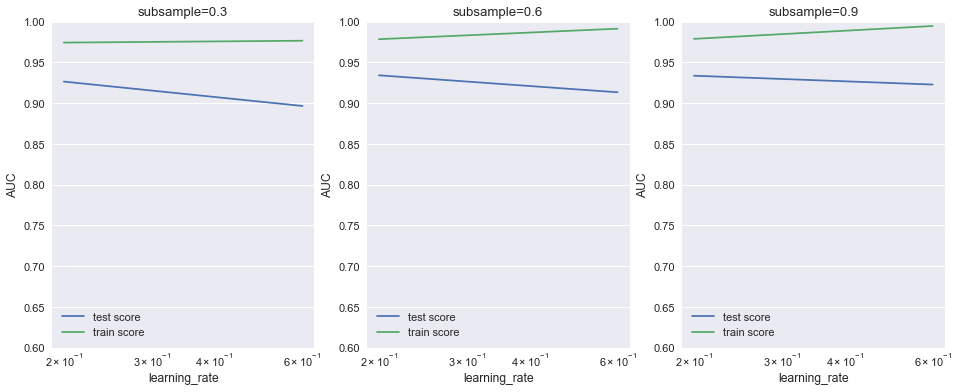

In [198]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='bottom right')
    plt.xscale('log')

In [199]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc



# fit model on training data
model = XGBClassifier(learning_rate = 0.2,max_depth= 3, n_estimators=100,subsample = 0.9,objective = 'binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)

In [200]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[ 0.14045149,  0.85954851],
       [ 0.53756356,  0.46243644],
       [ 0.99753672,  0.00246326],
       [ 0.99643284,  0.00356715],
       [ 0.98668844,  0.01331156],
       [ 0.97841936,  0.02158061],
       [ 0.9978891 ,  0.00211091],
       [ 0.99380481,  0.0061952 ],
       [ 0.99038416,  0.00961581],
       [ 0.76744092,  0.23255906]], dtype=float32)

In [201]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'aon': 0.020895522,
 'arpu_6': 0.02238806,
 'arpu_7': 0.017910447,
 'arpu_8': 0.011940299,
 'arpu_data_6': 0.0074626864,
 'arpu_data_7': 0.0074626864,
 'arpu_data_8': 0.0029850747,
 'av_rech_amt_data_6': 0.0029850747,
 'av_rech_amt_data_7': 0.0029850747,
 'av_rech_amt_data_8': 0.031343285,
 'col67_pct': 0.0059701493,
 'col6_io': 0.0059701493,
 'col78_pct': 0.016417911,
 'col7_io': 0.0089552235,
 'col8_io': 0.016417911,
 'days_data_last_rech_6': 0.0059701493,
 'days_data_last_rech_7': 0.0059701493,
 'days_data_last_rech_8': 0.0074626864,
 'days_last_rech_6': 0.0014925373,
 'days_last_rech_7': 0.0089552235,
 'days_last_rech_8': 0.038805969,
 'fb_user_6': 0.0,
 'fb_user_7': 0.0,
 'fb_user_8': 0.0044776117,
 'ic_others_6': 0.0044776117,
 'ic_others_7': 0.0,
 'ic_others_8': 0.0044776117,
 'is_monthly_usr': 0.0,
 'is_sachet_usr': 0.0,
 'isd_ic_mou_6': 0.0029850747,
 'isd_ic_mou_7': 0.0074626864,
 'isd_ic_mou_8': 0.0044776117,
 'isd_og_mou_6': 0.0014925373,
 'isd_og_mou_7': 0.011940299,
 'is

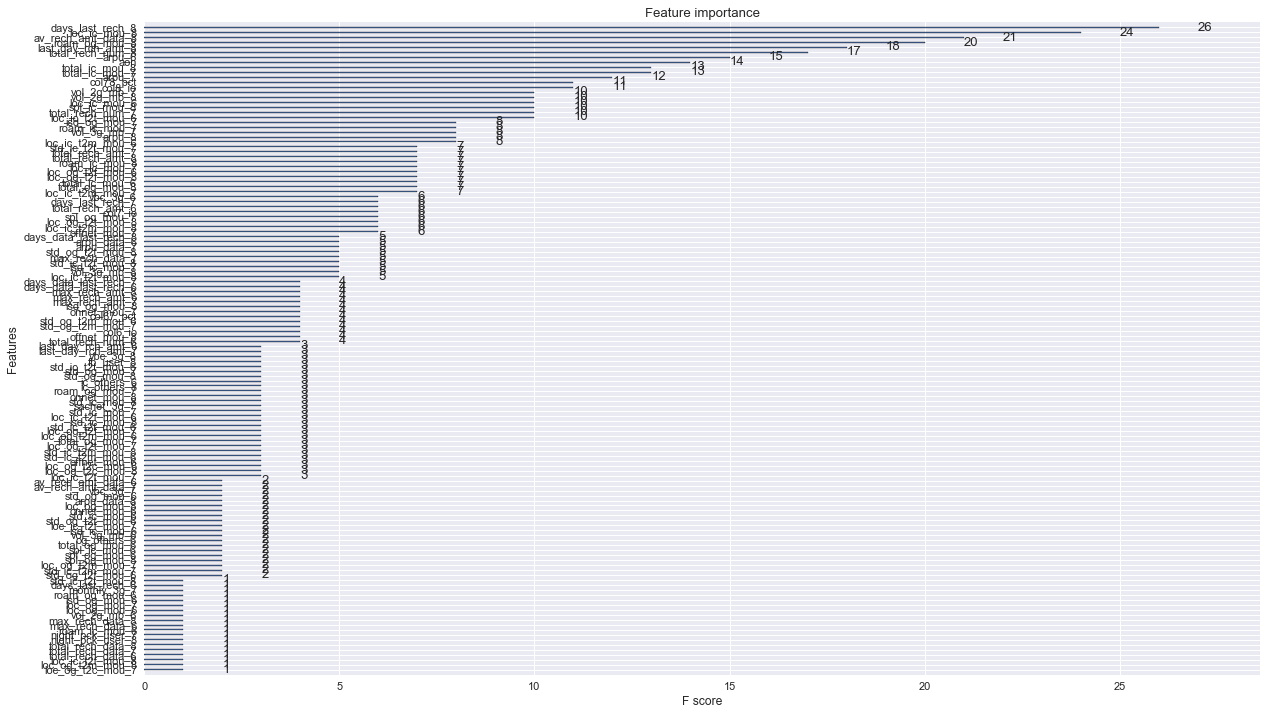

In [202]:

plot_importance(model)

Text(0.5,1,u'Most important features - XGboost')

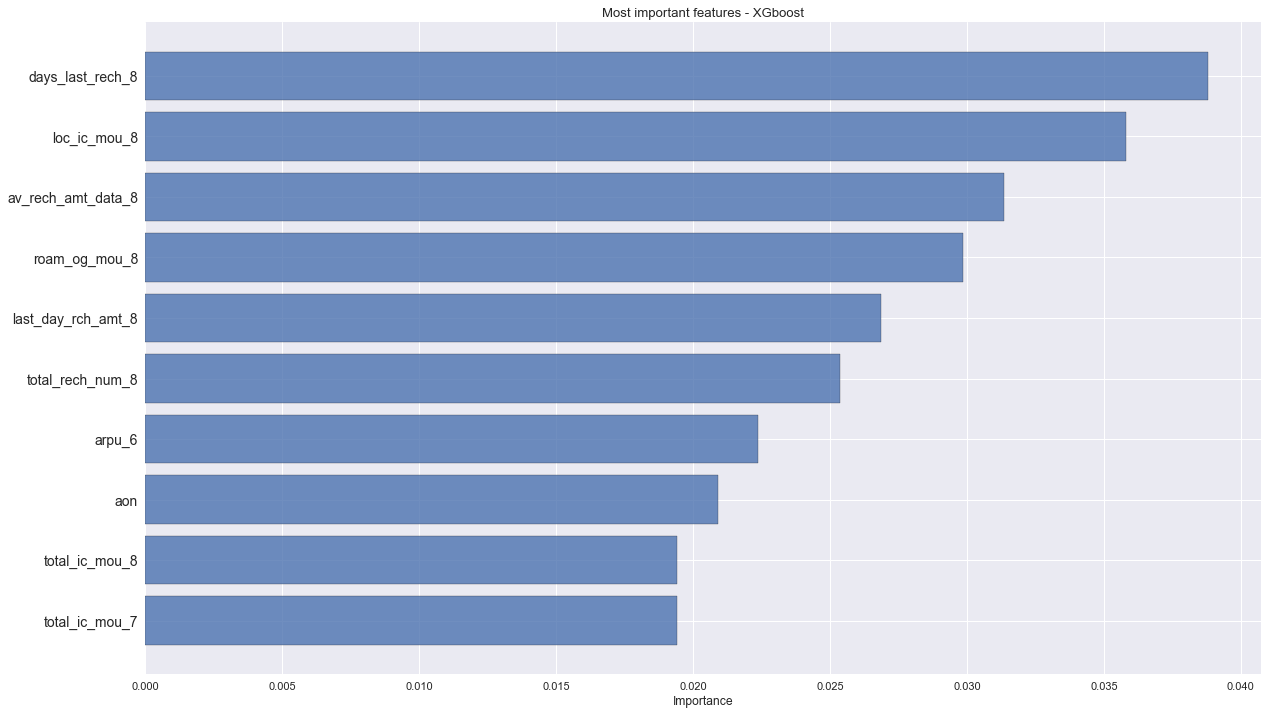

In [203]:
# plot only top 10 features
feature_names = X_train.columns
feature_imports = model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - XGboost')

In [204]:

#print in proper order (descending)
most_imp_features.Feature.tail(10).iloc[::-1]

144      days_last_rech_8
71           loc_ic_mou_8
116    av_rech_amt_data_8
20          roam_og_mou_8
107    last_day_rch_amt_8
98       total_rech_num_8
6                  arpu_6
135                   aon
86         total_ic_mou_8
85         total_ic_mou_7
Name: Feature, dtype: object

### we observe that key churn indicator features are
#### 1) days_last_rech_8
#### 2) last_day_rch_amt_8
####  3) aon
#### 4) arpu_6
#### 5) loc_ic_mou_8
#### 6) av_rech_amt_data_8
#### 7) roam_og_mou_8
#### 8) total_ic_mou_8

### We can infer from these that the user's usage data from Action phase (month 8/August) has direct impact on churn at end of 9th month (September).

## Final Recommendation

### 1) The local incoming minutes of usage in 8th month is a key indicator. If the customer is planning to churn they may stop using the number as primary and hence the incoming minutes may drop.
### 2) Telecom company should track the downward trend in the local incoming minutes of usage and start addressing such high value customers as they can potentially churn.
### 3) The average recharge amount is also another key indicator. We have seen in EDA as well that the total recharge amount drops significantly month over month for the churn customers. The average recharge amount indicates the same.
### 4) As a recommendation the average recharge amount should be tracked judiciously and any trends should be attributed toward potential churn customer and should be looked in detail.
### 5) Roaming is another reason which shows up and as customer moves out of the local zone there are good chances of him churning. The roaming increase MOU indicates customer may end up paying more for making the calls with the current network and may churn for better offer.

### Additionally the below features also are useful

### 1) The days of last recharge for 8 th month also indicates that customer may churn. The longer the recharge days the more chance of customer churning.
### 2) The Age of Network is also a key indicator the longer the customer is associated with the network the chance are less likely for him to churn. The telecom companies should look at the above indicators more specifically for the new customers.